# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

Craft your problem statement here using the prompt from the README and other sources you find during your investigation.

## Executive Summary
Write an executive summary that summarizes the problem and your key findings.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [125]:
#Imports the libraries for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#Setting display format to retina in matplotlib to see better quality images.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [126]:
# Reading the file (traffic-accidents-2008)
accidents_2008 = pd.read_csv('../data/saudi-arabia-traffic-accidents-2008.csv', sep=';')

In [127]:
# Reading the file (driving-licenses-2004-2008)
licenses_2004_2008 = pd.read_csv('../data/saudi-arabia-driving-licenses-2004-2008.csv', sep=';')

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [128]:
#print th top 10 rows from traffic-accidents-2008
accidents_2008.head(10)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,5,5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,6,6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,7,7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,9,9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


In [129]:
# delete duplicate columns
del accidents_2008['Unnamed: 0'] 
del accidents_2008['Unnamed: 0.1'] 

In [130]:
# print the data frame after removing duplicate columns
accidents_2008.head(10)

,Year,Region,Indicator,Value,geo_point_2d
0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


In [131]:
#print th top 10 rows from licenses_2004_2008
licenses_2004_2008.head(10)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


In [132]:
# delete duplicate columns
del licenses_2004_2008['Unnamed: 0'] 

In [133]:
# print the data frame after removing duplicate columns
licenses_2004_2008.head(10)

,Year,Administritive Area,Driving Liceses,geo_point_2d
0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

Answer:


From the traffic accidents dataset it contain the regions where the accidents happen and in which year. Also, the number of accidents and its condetions weather it's Dead or Injured, along with the geopint of the region.

From the licenses dataset it contain the year and the Administritive Area and the driving license number. Also the geopoint of the Administritive Area.

#### 4a. How complete is the data?

Investigate missing values etc.

In [134]:
#print the missing values from traffic-accidents-2008
accidents_2008.isnull().sum()

Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    6
dtype: int64

In [135]:
#print the missing values from licenses_2004_2008
licenses_2004_2008.isnull().sum()

Year                    0
Administritive Area     0
Driving Liceses         0
geo_point_2d           25
dtype: int64

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [136]:
# finding the min & max values for traffic-accidents-2008
print('=======The MIN value=======')
min_value_acc = accidents_2008.min()
print(min_value_acc)
print('=======The MAX value=======')
max_value_acc = accidents_2008.max()
print(max_value_acc)

=======The MIN value=======
Year                   (2016)
Region               Al-Baaha
Indicator    No. of Accidents
Value                   1007n
dtype: object
=======The MAX value=======
Year                              (2017)
Region                             Total
Indicator    No. of Casualties - Injured
Value                             99925n
dtype: object


In [137]:
# finding the min & max values for licenses_2004_2008
print('=======The MIN value=======')
min_value_lic = licenses_2004_2008.min()
print(min_value_lic)
print('=======The MAX value=======')
max_value_lic = licenses_2004_2008.max()
print(min_value_lic)

=======The MIN value=======
Year                    (1993)
Administritive Area    Al-Baha
Driving Liceses        100291n
dtype: object
=======The MAX value=======
Year                    (1993)
Administritive Area    Al-Baha
Driving Liceses        100291n
dtype: object


#### 5. What are your data types? 
Display the data types of each feature. 

In [138]:
#the data types for traffic-accidents-2008
accidents_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 5 columns):
Year            84 non-null object
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null object
geo_point_2d    78 non-null object
dtypes: object(5)
memory usage: 3.4+ KB


In [139]:
#the data types for licenses_2004_2008
licenses_2004_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 4 columns):
Year                   350 non-null object
Administritive Area    350 non-null object
Driving Liceses        350 non-null object
geo_point_2d           325 non-null object
dtypes: object(4)
memory usage: 11.1+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: 
the columns all are object so we can't perform any mathematic operation. So we have to convert some columns to integer such as: the year , values and Driving Liceses.

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [140]:
accidents_2008.head(10)

,Year,Region,Indicator,Value,geo_point_2d
0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


In [141]:
accidents_2008.tail(5)

,Year,Region,Indicator,Value,geo_point_2d
79,(2017),Asir,No. of Casualties - Injured,2368n,"19.1387847401, 42.941470036"
80,(2017),Hail,No. of Casualties - Injured,773n,"27.400845724, 41.4406960508"
81,(2017),Al-Baaha,No. of Casualties - Dead,134n,"20.1484058503, 41.4665484892"
82,(2017),Al-Baaha,No. of Accidents,1414n,"20.1484058503, 41.4665484892"
83,(2017),Al-Baaha,No. of Casualties - Injured,1007n,"20.1484058503, 41.4665484892"


In [142]:
#convert data types for traffic-accidents-2008
# remove () from the values in the Year column
accidents_2008['Year'] = accidents_2008['Year'].apply(lambda i:i.replace('(','').replace(')',''))
accidents_2008['Year']=accidents_2008['Year'].apply(lambda i:pd.to_numeric(i)) # convert the type of the Year to int

In [143]:
# remove n from the values in the Value column
accidents_2008['Value']=accidents_2008['Value'].apply(lambda x:x.replace('n',''))
accidents_2008['Value']=accidents_2008['Value'].apply(lambda x:pd.to_numeric(x)) # convert the type of the Value to int

In [144]:
accidents_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 5 columns):
Year            84 non-null int64
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null int64
geo_point_2d    78 non-null object
dtypes: int64(2), object(3)
memory usage: 3.4+ KB


In [145]:
accidents_2008.head(10)

,Year,Region,Indicator,Value,geo_point_2d
0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334"
1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439"
2,2016,Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394"
3,2016,Hail,No. of Casualties - Dead,299,"27.400845724, 41.4406960508"
4,2016,Hail,No. of Accidents,10199,"27.400845724, 41.4406960508"
5,2016,Northern Boarder,No. of Casualties - Dead,193,"30.197074783, 41.8171186952"
6,2017,Jazan,No. of Accidents,22161,"17.2072313962, 42.6525807422"
7,2017,Al-Jouf,No. of Accidents,10469,"29.9677445762, 39.5570371172"
8,2017,Total,No. of Casualties - Dead,7489,NaN
9,2016,Northern Boarder,No. of Casualties - Injured,631,"30.197074783, 41.8171186952"


In [146]:
licenses_2004_2008.head(10)

,Year,Administritive Area,Driving Liceses,geo_point_2d
0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


In [147]:
#convert data types for licenses_2004_2008
# remove () from the values in the Year column
licenses_2004_2008['Year'] = licenses_2004_2008['Year'].apply(lambda i:i.replace('(','').replace(')',''))
licenses_2004_2008['Year']=licenses_2004_2008['Year'].apply(lambda i:pd.to_numeric(i)) # convert the type of the Year to int

In [148]:
# remove n from the values in the Value column
licenses_2004_2008['Driving Liceses']=licenses_2004_2008['Driving Liceses'].apply(lambda x:x.replace('n',''))
licenses_2004_2008['Driving Liceses']=licenses_2004_2008['Driving Liceses'].apply(lambda x:pd.to_numeric(x)) # convert the type of the Value to int

In [149]:
licenses_2004_2008.head(10)

,Year,Administritive Area,Driving Liceses,geo_point_2d
0,2012,Makkah,143954,"21.628962766, 41.2636898334"
1,1994,Makkah,75349,"21.628962766, 41.2636898334"
2,1998,Makkah,86082,"21.628962766, 41.2636898334"
3,2004,Makkah,86636,"21.628962766, 41.2636898334"
4,2005,Makkah,65099,"21.628962766, 41.2636898334"
5,2008,Makkah,77013,"21.628962766, 41.2636898334"
6,2014,Madinah,31447,"24.927534539, 39.4918237173"
7,2013,Madinah,28513,"24.927534539, 39.4918237173"
8,2012,Madinah,14459,"24.927534539, 39.4918237173"
9,1994,Madinah,3767,"24.927534539, 39.4918237173"


In [150]:
licenses_2004_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 4 columns):
Year                   350 non-null int64
Administritive Area    350 non-null object
Driving Liceses        350 non-null int64
geo_point_2d           325 non-null object
dtypes: int64(2), object(2)
memory usage: 11.1+ KB


- Make new columns `x` and `y` using `geo_point_2d`

In [151]:
# split the values in in to x & y columns in the accidents_2008
new_accidents_2008 = accidents_2008["geo_point_2d"].str.split(",", n = 1, expand = True) 
  
# making separate x column from new data frame 
accidents_2008["x"]= new_accidents_2008[0] 
  
# making separate y column from new data frame 
accidents_2008["y"]= new_accidents_2008[1] 

In [152]:
# print accidents_2008 to check the new columns
accidents_2008.head(10)

,Year,Region,Indicator,Value,geo_point_2d,x,y
0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439
2,2016,Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394",27.90165499,37.2598581394
3,2016,Hail,No. of Casualties - Dead,299,"27.400845724, 41.4406960508",27.400845724,41.4406960508
4,2016,Hail,No. of Accidents,10199,"27.400845724, 41.4406960508",27.400845724,41.4406960508
5,2016,Northern Boarder,No. of Casualties - Dead,193,"30.197074783, 41.8171186952",30.197074783,41.8171186952
6,2017,Jazan,No. of Accidents,22161,"17.2072313962, 42.6525807422",17.2072313962,42.6525807422
7,2017,Al-Jouf,No. of Accidents,10469,"29.9677445762, 39.5570371172",29.9677445762,39.5570371172
8,2017,Total,No. of Casualties - Dead,7489,NaN,NaN,NaN
9,2016,Northern Boarder,No. of Casualties - Injured,631,"30.197074783, 41.8171186952",30.197074783,41.8171186952


In [153]:
# split the values in in to x & y columns in the licenses_2004_2008
# new data frame with split value columns 
new_licenses_2004_2008 = licenses_2004_2008["geo_point_2d"].str.split(",", n = 1, expand = True) 
  
# making separate x column from new data frame 
licenses_2004_2008["x"]= new_licenses_2004_2008[0] 
  
# making separate y column from new data frame 
licenses_2004_2008["y"]= new_licenses_2004_2008[1] 
  

In [154]:
# print licenses_2004_2008 to check the new columns
licenses_2004_2008.head(10)

,Year,Administritive Area,Driving Liceses,geo_point_2d,x,y
0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,1994,Makkah,75349,"21.628962766, 41.2636898334",21.628962766,41.2636898334
2,1998,Makkah,86082,"21.628962766, 41.2636898334",21.628962766,41.2636898334
3,2004,Makkah,86636,"21.628962766, 41.2636898334",21.628962766,41.2636898334
4,2005,Makkah,65099,"21.628962766, 41.2636898334",21.628962766,41.2636898334
5,2008,Makkah,77013,"21.628962766, 41.2636898334",21.628962766,41.2636898334
6,2014,Madinah,31447,"24.927534539, 39.4918237173",24.927534539,39.4918237173
7,2013,Madinah,28513,"24.927534539, 39.4918237173",24.927534539,39.4918237173
8,2012,Madinah,14459,"24.927534539, 39.4918237173",24.927534539,39.4918237173
9,1994,Madinah,3767,"24.927534539, 39.4918237173",24.927534539,39.4918237173


- Fix any individual values preventing other columns from being the appropriate type.

In [155]:
# check the region names to make it match with the licenses_2004_2008
print('There are {}nnique Region in the dataset'.format(accidents_2008['Region'].nunique()))
accidents_2008['Region'].value_counts()

There are 14nnique Region in the dataset


Tabouk              6
Najran              6
Eastern Region      6
Riyadh              6
Qassim              6
Asir                6
Al-Baaha            6
Al-Jouf             6
Makkah              6
Total               6
Jazan               6
Hail                6
Madinah             6
Northern Boarder    6
Name: Region, dtype: int64

In [156]:
# change the Qassim value to match it with licenses_2004_2008
accidents_2008['Region'].replace(['Qassim'], ['Al-Qaseem'], inplace=True)
accidents_2008['Region'].replace(['Al-Baaha'], ['Al-Baha'], inplace=True)

In [157]:
# change the Assir, Eastern  values to match it with accidents_2008
licenses_2004_2008['Administritive Area'].replace(['Assir'], ['Asir'], inplace=True)
licenses_2004_2008['Administritive Area'].replace(['Eastern'], ['Eastern Region'], inplace=True)
licenses_2004_2008['Administritive Area'].replace(['Al-Baaha'], ['Al-Baha'], inplace=True)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [158]:
# check again if the value change or not for accidents_2008
print('There are {}nnique Region in the dataset'.format(accidents_2008['Region'].nunique()))
accidents_2008['Region'].value_counts()

There are 14nnique Region in the dataset


Tabouk              6
Al-Qaseem           6
Najran              6
Riyadh              6
Asir                6
Eastern Region      6
Al-Jouf             6
Makkah              6
Total               6
Jazan               6
Al-Baha             6
Hail                6
Madinah             6
Northern Boarder    6
Name: Region, dtype: int64

In [159]:
# check again if the value change or not for licenses_2004_2008
print('There are {}nnique Region  in the dataset'.format(licenses_2004_2008['Administritive Area'].nunique()))
licenses_2004_2008['Administritive Area'].value_counts()

There are 14nnique Region  in the dataset


Najran              25
Al-Qaseem           25
Riyadh              25
Asir                25
Eastern Region      25
Al-Jouf             25
Jazan               25
Hail                25
Tabouk              25
Northern Boarder    25
Makkah              25
Total               25
Al-Baha             25
Madinah             25
Name: Administritive Area, dtype: int64

- Display the data types again to confirm they are correct.

In [160]:
# printing data type for accidents_2008
accidents_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
Year            84 non-null int64
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null int64
geo_point_2d    78 non-null object
x               78 non-null object
y               78 non-null object
dtypes: int64(2), object(5)
memory usage: 4.7+ KB


In [161]:
# printing data type for licenses_2004_2008
licenses_2004_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
Year                   350 non-null int64
Administritive Area    350 non-null object
Driving Liceses        350 non-null int64
geo_point_2d           325 non-null object
x                      325 non-null object
y                      325 non-null object
dtypes: int64(2), object(4)
memory usage: 16.5+ KB


#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [162]:
accidents_2008.columns

Index(['Year', 'Region', 'Indicator', 'Value', 'geo_point_2d', 'x', 'y'], dtype='object')

In [163]:
# rename columns for accidents_2008
accidents_2008.rename(columns ={'Year':'year', 'Region':'region', 
                                       'Indicator':'indicator', 'Value':'value', 
                                       'geo_point_2d':'geopoint','x':'x_Longitude',
                                       'y':'y_latitude'},inplace=True) 


In [164]:
accidents_2008.columns

Index(['year', 'region', 'indicator', 'value', 'geopoint', 'x_Longitude',
       'y_latitude'],
      dtype='object')

In [165]:
licenses_2004_2008.columns

Index(['Year', 'Administritive Area', 'Driving Liceses', 'geo_point_2d', 'x',
       'y'],
      dtype='object')

In [166]:
# rename columns for accidents_2008
licenses_2004_2008.rename(columns ={'Year':'year', 'Administritive Area':'region', 
                                       'Driving Liceses':'driving_licenses', 'geo_point_2d':'geopoint', 
                                       'x':'x_Longitude',
                                       'y':'y_latitude'},inplace=True) 

In [167]:
licenses_2004_2008.columns

Index(['year', 'region', 'driving_licenses', 'geopoint', 'x_Longitude',
       'y_latitude'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|year|int|Traffic_Accidents|This is the year when the accident happened| 
|region|object|Traffic_Accidents|This is locate in which region the accident happened| 
|indicator|object|Traffic_Accidents|This is identify the Number of Casualties and the condition (Dead or Injured)| 
|value|int|Traffic_Accidents|This is the number of accidents|
|geopoint|int|Traffic_Accidents|This is holds geographic point coordinates| 
|year|int|Driving_Licenses|This is the year when the Licenses issued| 
|region|object|Driving_Licenses|This is the year where the Licenses issued| 
|driving_licenses|int|Driving_Licenses|This is the Licenses number | 
|geopoint_lic|object|Driving_Licenses|This is holds geographic point coordinates| 
|x_Longitude|object|Driving_Licenses|sets the Latitude properties of geopoint| 
|y_latitude|object|Driving_Licenses|sets the Longitude properties of geopoint| 


Feature	Type	Dataset	Description
column name	int/float/object	Driving_Licenses/Traffic_Accidents	This is an example


#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [168]:
#check the values in region 
accidents_2008['region'].unique()

array(['Makkah', 'Eastern Region', 'Tabouk', 'Hail', 'Northern Boarder',
       'Jazan', 'Al-Jouf', 'Total', 'Al-Baha', 'Riyadh', 'Madinah',
       'Al-Qaseem', 'Najran', 'Asir'], dtype=object)

In [169]:
# remove rows the have the region valeu (total)
accidents_2008.drop(accidents_2008[accidents_2008['region'] =='Total'].index, inplace = True)

In [170]:
#check the values in region after removing (total)
accidents_2008['region'].unique()

array(['Makkah', 'Eastern Region', 'Tabouk', 'Hail', 'Northern Boarder',
       'Jazan', 'Al-Jouf', 'Al-Baha', 'Riyadh', 'Madinah', 'Al-Qaseem',
       'Najran', 'Asir'], dtype=object)

In [171]:
# check the vales in administritive_area
licenses_2004_2008['region'].unique()

array(['Makkah', 'Madinah', 'Al-Qaseem', 'Eastern Region', 'Asir',
       'Tabouk', 'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha',
       'Al-Jouf', 'Total', 'Riyadh'], dtype=object)

In [172]:
# remove rows the have the region valeu (total)
licenses_2004_2008.drop(licenses_2004_2008[licenses_2004_2008['region'] =='Total'].index, inplace = True)

In [173]:
# check the vales in administritive_area after removing (total)
licenses_2004_2008['region'].unique()

array(['Makkah', 'Madinah', 'Al-Qaseem', 'Eastern Region', 'Asir',
       'Tabouk', 'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha',
       'Al-Jouf', 'Riyadh'], dtype=object)

#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

The 2 data frame is consider to be long format

#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

In [174]:
accidents_2008

,year,region,indicator,value,geopoint,x_Longitude,y_latitude
0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439
2,2016,Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394",27.90165499,37.2598581394
3,2016,Hail,No. of Casualties - Dead,299,"27.400845724, 41.4406960508",27.400845724,41.4406960508
4,2016,Hail,No. of Accidents,10199,"27.400845724, 41.4406960508",27.400845724,41.4406960508
...,...,...,...,...,...,...,...
79,2017,Asir,No. of Casualties - Injured,2368,"19.1387847401, 42.941470036",19.1387847401,42.941470036
80,2017,Hail,No. of Casualties - Injured,773,"27.400845724, 41.4406960508",27.400845724,41.4406960508
81,2017,Al-Baha,No. of Casualties - Dead,134,"20.1484058503, 41.4665484892",20.1484058503,41.4665484892
82,2017,Al-Baha,No. of Accidents,1414,"20.1484058503, 41.4665484892",20.1484058503,41.4665484892


In [175]:
# create pivot_table for accidents_2008 dataset

traffic_accidents_2008 = accidents_2008.pivot_table(index = ['year','region', 'x_Longitude','y_latitude'] ,columns = 'indicator'
                                                    , values = 'value').reset_index().rename_axis(None, axis=1)


In [176]:
traffic_accidents_2008.head()

,year,region,x_Longitude,y_latitude,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
0,2016,Al-Baha,20.1484058503,41.4665484892,3618,185,1227
1,2016,Al-Jouf,29.9677445762,39.5570371172,10212,245,920
2,2016,Al-Qaseem,26.1967063704,43.3429998455,25664,397,1513
3,2016,Asir,19.1387847401,42.941470036,32684,983,2541
4,2016,Eastern Region,23.2883307307,50.1478302439,101619,1113,4893


In [177]:
licenses_2004_2008

,year,region,driving_licenses,geopoint,x_Longitude,y_latitude
0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,1994,Makkah,75349,"21.628962766, 41.2636898334",21.628962766,41.2636898334
2,1998,Makkah,86082,"21.628962766, 41.2636898334",21.628962766,41.2636898334
3,2004,Makkah,86636,"21.628962766, 41.2636898334",21.628962766,41.2636898334
4,2005,Makkah,65099,"21.628962766, 41.2636898334",21.628962766,41.2636898334
...,...,...,...,...,...,...
345,2000,Tabouk,8473,"27.90165499, 37.2598581394",27.90165499,37.2598581394
346,2006,Tabouk,8259,"27.90165499, 37.2598581394",27.90165499,37.2598581394
347,2013,Hail,9731,"27.400845724, 41.4406960508",27.400845724,41.4406960508
348,1997,Hail,6606,"27.400845724, 41.4406960508",27.400845724,41.4406960508


In [178]:
# create pivot_table for licenses_2004_2008

carlicenses_2004_2008 = licenses_2004_2008.pivot_table(index = ['year','region', 'x_Longitude','y_latitude']
                                                    , values = 'driving_licenses').reset_index().rename_axis(None, axis=1)
carlicenses_2004_2008.head()

,year,region,x_Longitude,y_latitude,driving_licenses
0,1993,Al-Baha,20.1484058503,41.4665484892,3270
1,1993,Al-Jouf,29.9677445762,39.5570371172,2884
2,1993,Al-Qaseem,26.1967063704,43.3429998455,73618
3,1993,Asir,19.1387847401,42.941470036,6226
4,1993,Eastern Region,23.2883307307,50.1478302439,9964


#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [179]:
#merge traffic_accidents_2008 with carlicenses_2004_2008
accidents_licenses= pd.merge(traffic_accidents_2008,carlicenses_2004_2008, on=['year','region','x_Longitude','y_latitude' ],  how ='outer' )


In [180]:
accidents_licenses.head()

,year,region,x_Longitude,y_latitude,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured,driving_licenses
0,2016,Al-Baha,20.1484058503,41.4665484892,3618.0,185.0,1227.0,4614
1,2016,Al-Jouf,29.9677445762,39.5570371172,10212.0,245.0,920.0,9371
2,2016,Al-Qaseem,26.1967063704,43.3429998455,25664.0,397.0,1513.0,9180
3,2016,Asir,19.1387847401,42.941470036,32684.0,983.0,2541.0,41367
4,2016,Eastern Region,23.2883307307,50.1478302439,101619.0,1113.0,4893.0,142307


#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [181]:
# using to_csv() function to svae the new merge daraset
accidents_licenses.to_csv('combined_datasets.csv', index=False)  

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [182]:
# loding the merged dataset
combined_accidents_licenses = pd.read_csv('combined_datasets.csv')


In [183]:
# using describe() to print a sammary statistic
combined_accidents_licenses.describe()

,year,x_Longitude,y_latitude,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured,driving_licenses
count,325.000000,325.000000,325.000000,26.000000,26.000000,26.000000,325.000000
mean,2005.000000,23.810447,42.602789,38225.692308,635.384615,2743.038462,28915.347692
std,7.222222,4.197987,3.254196,46493.705035,549.783381,2922.641127,47419.058819
min,1993.000000,17.207231,37.259858,1414.000000,112.000000,374.000000,915.000000
25%,1999.000000,20.148406,41.263690,10276.250000,241.250000,923.000000,4846.000000
50%,2005.000000,23.288331,41.817119,16050.500000,415.500000,1618.500000,10267.000000
75%,2011.000000,27.400846,43.343000,30981.250000,929.250000,3784.000000,25423.000000
max,2017.000000,30.197075,50.147830,145541.000000,2243.000000,12383.000000,495307.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [184]:
combined_accidents_licenses.head()

,year,region,x_Longitude,y_latitude,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured,driving_licenses
0,2016,Al-Baha,20.148406,41.466548,3618.0,185.0,1227.0,4614
1,2016,Al-Jouf,29.967745,39.557037,10212.0,245.0,920.0,9371
2,2016,Al-Qaseem,26.196706,43.343000,25664.0,397.0,1513.0,9180
3,2016,Asir,19.138785,42.941470,32684.0,983.0,2541.0,41367
4,2016,Eastern Region,23.288331,50.147830,101619.0,1113.0,4893.0,142307


In [185]:
# rename the columns in the merged dataset
combined_accidents_licenses.rename(columns ={'No. of Accidents':'No_of_Accidents', 'No. of Casualties - Dead':'total_Dead', 
                                    'No. of Casualties - Injured':'total_injured','Driving Liceses':'driving_licenses'}
                                     ,inplace=True) 

In [186]:
combined_accidents_licenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 8 columns):
year                325 non-null int64
region              325 non-null object
x_Longitude         325 non-null float64
y_latitude          325 non-null float64
No_of_Accidents     26 non-null float64
total_Dead          26 non-null float64
total_injured       26 non-null float64
driving_licenses    325 non-null int64
dtypes: float64(5), int64(2), object(1)
memory usage: 20.4+ KB


In [187]:
#calculate the std for No. of Accidents
mean = sum(traffic_accidents_2008['No. of Accidents'].values) / len(traffic_accidents_2008['No. of Accidents'])   # find the mean
var  = sum(pow(x-mean,2) for x in traffic_accidents_2008['No. of Accidents'].values) / len(traffic_accidents_2008['No. of Accidents'])  # find the variance
Accidents_std  = np.sqrt(var)  # find the standard deviation
Accidents_std


C:\Users\fatma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  This is separate from the ipykernel package so we can avoid doing imports until


45590.82869880505

In [188]:
#calculate the std for No. of Casualties - Dead
mean = sum(traffic_accidents_2008['No. of Casualties - Dead'].values) / len(traffic_accidents_2008['No. of Casualties - Dead'])   # find the mean
var  = sum(pow(x-mean,2) for x in traffic_accidents_2008['No. of Casualties - Dead'].values) / len(traffic_accidents_2008['No. of Casualties - Dead'])  # find the variance
Casualties_Dead_std  = np.sqrt(var)  # find the standard deviation
Casualties_Dead_std


C:\Users\fatma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  This is separate from the ipykernel package so we can avoid doing imports until


539.1069593406002

In [189]:
#calculate the std for No. of Casualties - Injured
mean = sum(traffic_accidents_2008['No. of Casualties - Injured'].values) / len(traffic_accidents_2008['No. of Casualties - Injured'])   # find the mean
var  = sum(pow(x-mean,2) for x in traffic_accidents_2008['No. of Casualties - Injured'].values) / len(traffic_accidents_2008['No. of Casualties - Injured'])  # find the variance
Casualties_Injured_std  = np.sqrt(var)  # find the standard deviation
Casualties_Injured_std

C:\Users\fatma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  This is separate from the ipykernel package so we can avoid doing imports until


2865.8854113220236

In [190]:
#calculate the std for driving_licenses
mean = sum(carlicenses_2004_2008['driving_licenses'].values) / len(carlicenses_2004_2008['driving_licenses'])   # find the mean
var  = sum(pow(x-mean,2) for x in carlicenses_2004_2008['driving_licenses'].values) / len(carlicenses_2004_2008['driving_licenses'])  # find the variance
licenses_std  = np.sqrt(var)  # find the standard deviation
licenses_std

C:\Users\fatma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  This is separate from the ipykernel package so we can avoid doing imports until


47346.05021744642

In [191]:
# in the bellow codes I calculated the std using np.std() function
#using numpy's std method on No. of Accidents
sd_acc = np.std(combined_accidents_licenses['No_of_Accidents'])
sd_acc

45590.82869880505

In [192]:
#using numpy's std method on No. of Casualties - Dead
sd_no_dead = np.std(combined_accidents_licenses['total_Dead'])
sd_no_dead

539.1069593406002

In [193]:
#using numpy's std method on No. of Casualties - Injured
sd_no_injured = np.std(combined_accidents_licenses['total_injured'])
sd_no_injured

2865.8854113220236

In [194]:
#using numpy's std method on driving_licenses
sd_no_lic = np.std(carlicenses_2004_2008['driving_licenses'])
sd_no_lic

47346.05021744642

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [195]:
# combine the std with the features in a dictionary
sd = [Accidents_std, Casualties_Dead_std, Casualties_Injured_std, licenses_std]
col = ['No. of Accidents','No. of Casualties - Dead','No. of Casualties - Injured','driving_licenses']
#result_dict = {i:j for i in col for j in sd}
new_dict = {k: v for k, v in zip(col, sd)}

In [196]:
new_dict

{'No. of Accidents': 45590.82869880505,
 'No. of Casualties - Dead': 539.1069593406002,
 'No. of Casualties - Injured': 2865.8854113220236,
 'driving_licenses': 47346.05021744642}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:

the manually calculated STD doesn't match with the STD from describe() function. the manually is slightly less than STD from describe(), but it match when I calculated the std using np.std()

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [197]:
# Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
#sort the values of driving_licenses
max_min_Licenses= combined_accidents_licenses.sort_values('driving_licenses')


In [198]:
#print the top rows to findout the lowest values of driving_licenses
max_min_Licenses.head()

,year,region,x_Longitude,y_latitude,No_of_Accidents,total_Dead,total_injured,driving_licenses
324,2015,Tabouk,27.901655,37.259858,NaN,NaN,NaN,915
208,2007,Al-Baha,20.148406,41.466548,NaN,NaN,NaN,997
62,1995,Northern Boarder,30.197075,41.817119,NaN,NaN,NaN,1318
75,1996,Northern Boarder,30.197075,41.817119,NaN,NaN,NaN,1383
49,1994,Northern Boarder,30.197075,41.817119,NaN,NaN,NaN,1457


From the table above it shows the lowest region has Driving Licenses based on years 1993 - 2017 which are Tabouk, Al-Baha and Northern Boarder

In [199]:
# #print the top rows to findout the highest values of driving_licenses

max_min_Licenses.tail()

,year,region,x_Longitude,y_latitude,No_of_Accidents,total_Dead,total_injured,driving_licenses
320,2015,Makkah,21.628963,41.263690,NaN,NaN,NaN,157389
297,2013,Riyadh,23.081434,45.585751,NaN,NaN,NaN,165994
310,2014,Riyadh,23.081434,45.585751,NaN,NaN,NaN,194208
11,2016,Riyadh,23.081434,45.585751,141736.0,1430.0,4207.0,242851
24,2017,Riyadh,23.081434,45.585751,99925.0,1399.0,4540.0,495307


From the table above it shows the highest region has Driving Licenses based on years 1993 - 2017 which are Riyadh and Makkah

In [200]:
# Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
# group the region the calculate the mean of No_of_Accidents in all years
mean_reg= combined_accidents_licenses.groupby('region').mean().sort_values('No_of_Accidents')
mean_reg


,year,x_Longitude,y_latitude,No_of_Accidents,total_Dead,total_injured,driving_licenses
region,,,,,,,
Al-Baha,2005.0,20.148406,41.466548,2516.0,159.5,1117.0,4682.04
Najran,2005.0,18.451100,46.868850,3214.0,183.5,736.0,5659.76
Hail,2005.0,27.400846,41.440696,9789.0,282.0,852.5,10311.28
Al-Jouf,2005.0,29.967745,39.557037,10340.5,242.5,891.0,6586.08
Northern Boarder,2005.0,30.197075,41.817119,12368.0,152.5,502.5,2895.88
Tabouk,2005.0,27.901655,37.259858,13872.0,391.0,1483.5,8153.96
Madinah,2005.0,24.927535,39.491824,15272.5,701.0,3550.5,13963.36
Jazan,2005.0,17.207231,42.652581,24017.0,490.0,2233.0,8562.64
Al-Qaseem,2005.0,26.196706,43.343000,24034.5,358.0,1479.5,22491.68


From the result above it shows that Al-Baha has the lowest mean Traffic Accidents numbers while Makkah has the highest traffic mean 

In [201]:
# What are the regions that have more Traffic Accidents happened in each year than the year average?
# group by the year then find the mean of No_of_Accidents
year_mean_acci = combined_accidents_licenses.groupby('year').No_of_Accidents.mean()
combined_accidents_licenses['myear_acc'] = (combined_accidents_licenses.year.apply(lambda x: year_mean_acci[x]))

In [202]:
#compare the No_of_Accidents with the No_of_Accidents with mean of No_of_Accidents
high_region_acci = combined_accidents_licenses[combined_accidents_licenses.No_of_Accidents > combined_accidents_licenses.myear_acc]
high_region_acci.sort_values('No_of_Accidents',ascending=False).head()


,year,region,x_Longitude,y_latitude,No_of_Accidents,total_Dead,total_injured,driving_licenses,myear_acc
21,2017,Makkah,21.628963,41.263690,145541.0,1641.0,10623.0,142487,35422.153846
11,2016,Riyadh,23.081434,45.585751,141736.0,1430.0,4207.0,242851,41029.230769
8,2016,Makkah,21.628963,41.263690,134838.0,2243.0,12383.0,136055,41029.230769
4,2016,Eastern Region,23.288331,50.147830,101619.0,1113.0,4893.0,142307,41029.230769
24,2017,Riyadh,23.081434,45.585751,99925.0,1399.0,4540.0,495307,35422.153846


From the table above it shows that Makkah and Riyadh have the most traffic accidents

In [203]:
# what are the regions that have more Driving Licenses issued in each year than the year average?
year_mean_lice = combined_accidents_licenses.groupby('year').driving_licenses.mean()
combined_accidents_licenses['myear_lice'] = (combined_accidents_licenses.year.apply(lambda x: year_mean_lice[x]))

In [80]:
high_region_lice = combined_accidents_licenses[combined_accidents_licenses.driving_licenses > combined_accidents_licenses.myear_lice]
high_region_lice.sort_values('driving_licenses',ascending=False).head()


,year,region,x_Longitude,y_latitude,No_of_Accidents,total_Dead,total_injured,driving_licenses,myear_acc,myear_lice
24,2017,Riyadh,23.081434,45.585751,99925.0,1399.0,4540.0,495307,35422.153846,71397.307692
11,2016,Riyadh,23.081434,45.585751,141736.0,1430.0,4207.0,242851,41029.230769,53616.692308
310,2014,Riyadh,23.081434,45.585751,NaN,NaN,NaN,194208,NaN,48108.769231
297,2013,Riyadh,23.081434,45.585751,NaN,NaN,NaN,165994,NaN,43485.692308
320,2015,Makkah,21.628963,41.263690,NaN,NaN,NaN,157389,NaN,33495.307692


From the table above it shows that Riyadh and Makkah have the most driving licenses

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

<function matplotlib.pyplot.show(*args, **kw)>

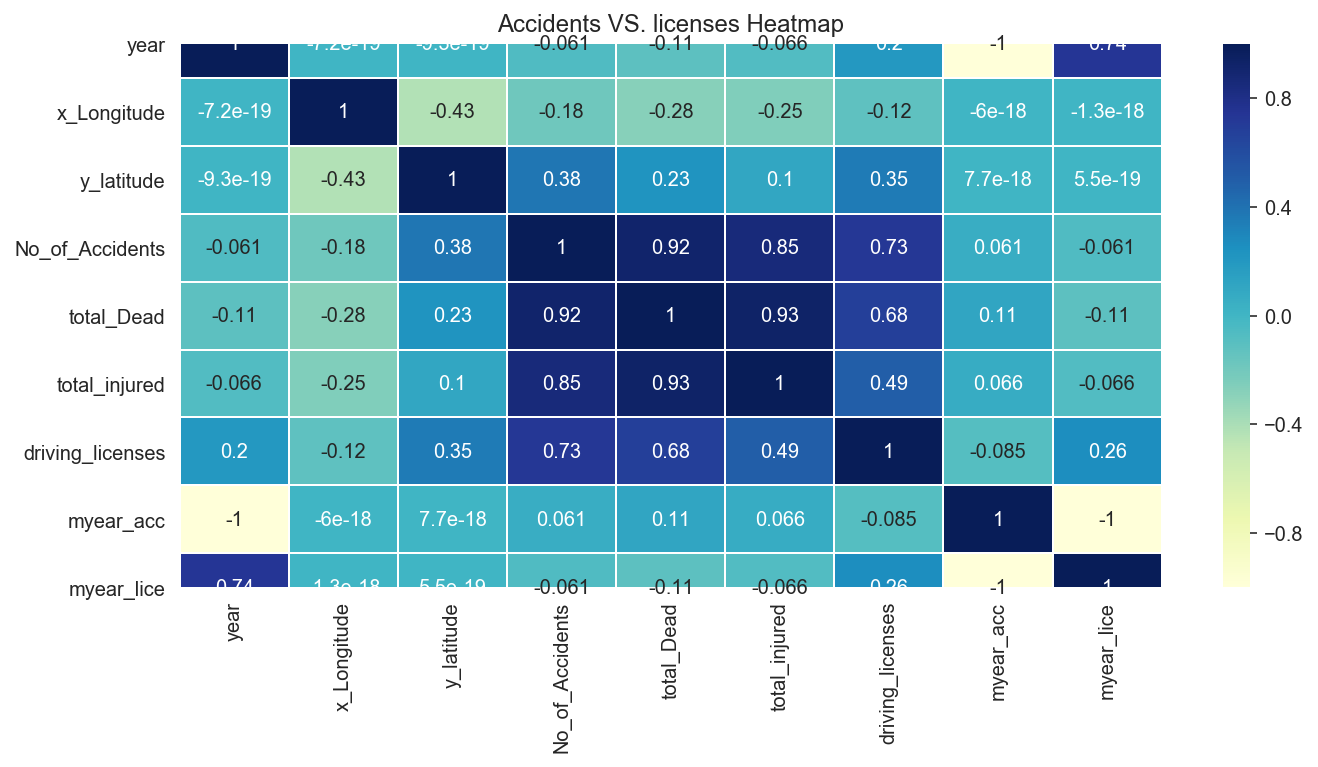

In [81]:
fig, ax = plt.subplots(figsize=(11,5))

sns.heatmap(combined_accidents_licenses.corr(), annot=True, linewidths=0.50, cmap="YlGnBu")
# add title to heatmap
ax.set_title('Accidents VS. licenses Heatmap')
plt.show

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [114]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i]) # Set titles
        ax[i].set_xlabel(list_of_xlabels[i]) # Set labels


In [115]:
# set the values of the parameters 
list_of_columns = ['No_of_Accidents','total_Dead','total_injured', 'driving_licenses']
list_of_titles = ['No_of_Accidents','total_Dead','total_injured', 'driving_licenses']
list_of_xlabels = ['No. of Accidents','No. of Casualties - Dead','No. of Casualties - Injured', 'driving_licenses']

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

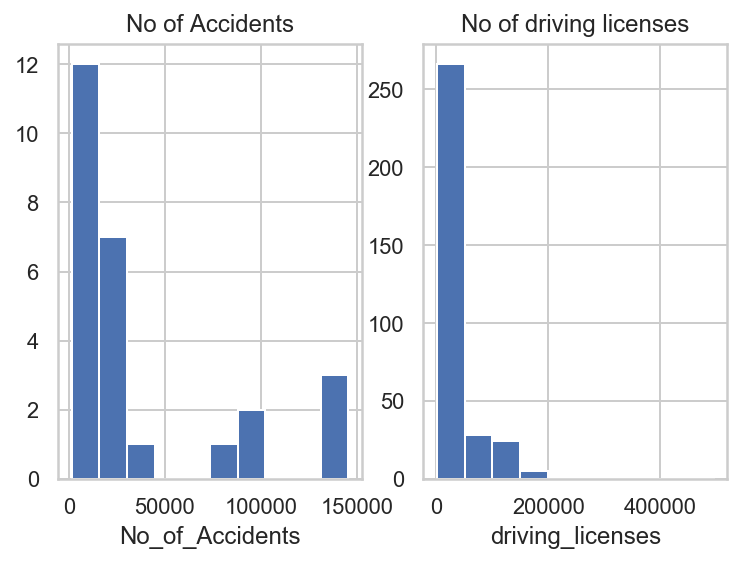

In [204]:
# plot for Driving Licenses number
subplot_histograms(combined_accidents_licenses,['No_of_Accidents','driving_licenses'],
                                              ['No of Accidents','No of driving licenses'],
                                              ['No_of_Accidents','driving_licenses'])


Plot and interpret scatter plots
For each of the following:

Driving Licenses vs. Traffic Accidents for 2017
Driving Licenses vs. Traffic Accidents for 2016
Driving Licenses for 2016 vs 2017
Traffic Accidents for 2016 vs 2017
Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:

Two clearly labeled axes
A proper title
Using colors and symbols that are clear and unmistakable
Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.

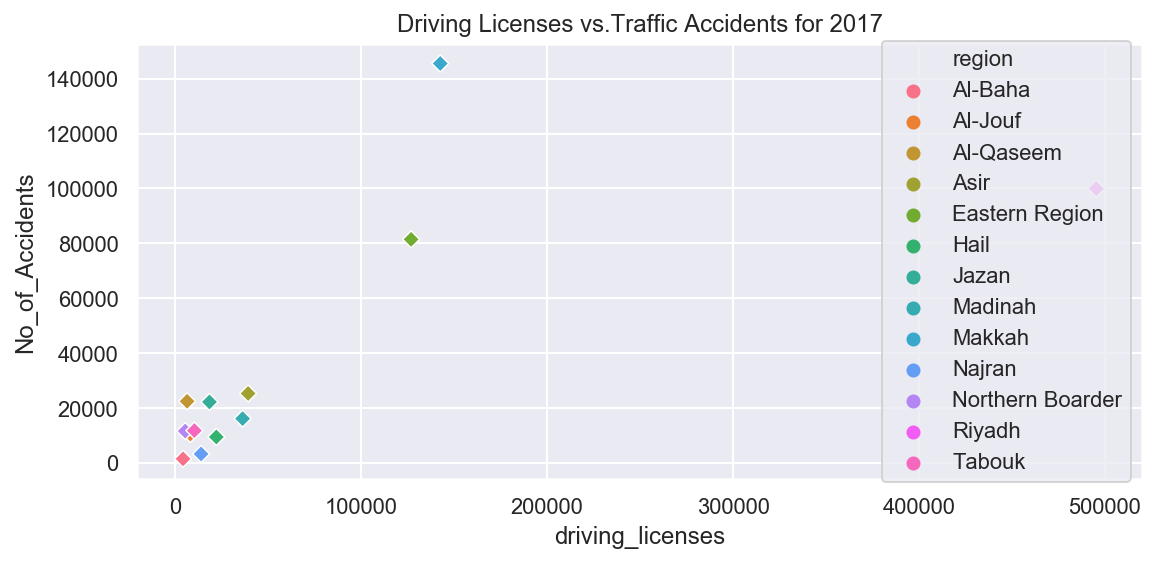

In [117]:
# Driving Licenses vs. Traffic Accidents for 2017
Licenses_Traffic_2017 = combined_accidents_licenses[combined_accidents_licenses.year== 2017]
plt.figure(figsize=(9,4))
plt.title('Driving Licenses vs.Traffic Accidents for 2017')
sns.scatterplot(x='driving_licenses' ,y='No_of_Accidents' ,data =Licenses_Traffic_2017, marker ='D',hue='region')
plt.legend(loc='right')



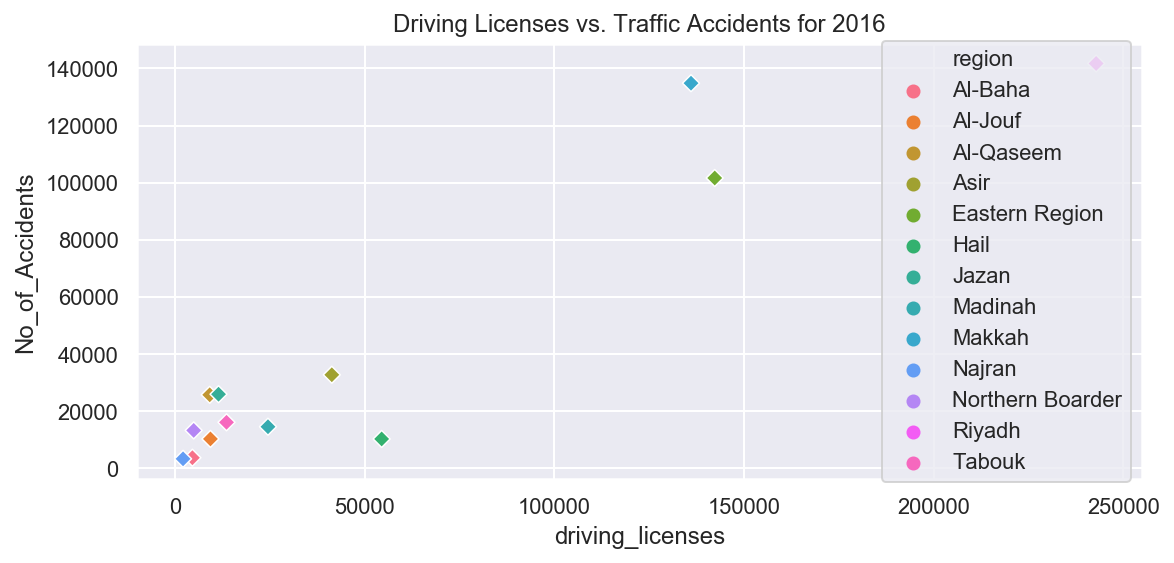

In [118]:
# Driving Licenses vs. Traffic Accidents for 2016
Licenses_Traffic_2016 = combined_accidents_licenses[combined_accidents_licenses.year== 2016]
plt.figure(figsize=(9,4))
plt.title('Driving Licenses vs. Traffic Accidents for 2016')
sns.scatterplot(x='driving_licenses' ,y='No_of_Accidents' ,data =Licenses_Traffic_2016, marker ='D', hue='region')
plt.legend(loc='right')



In [119]:
# Driving Licenses for 2016 vs 2017
Licenses_2016_2017 = combined_accidents_licenses[combined_accidents_licenses.year.between(2016,2017)]


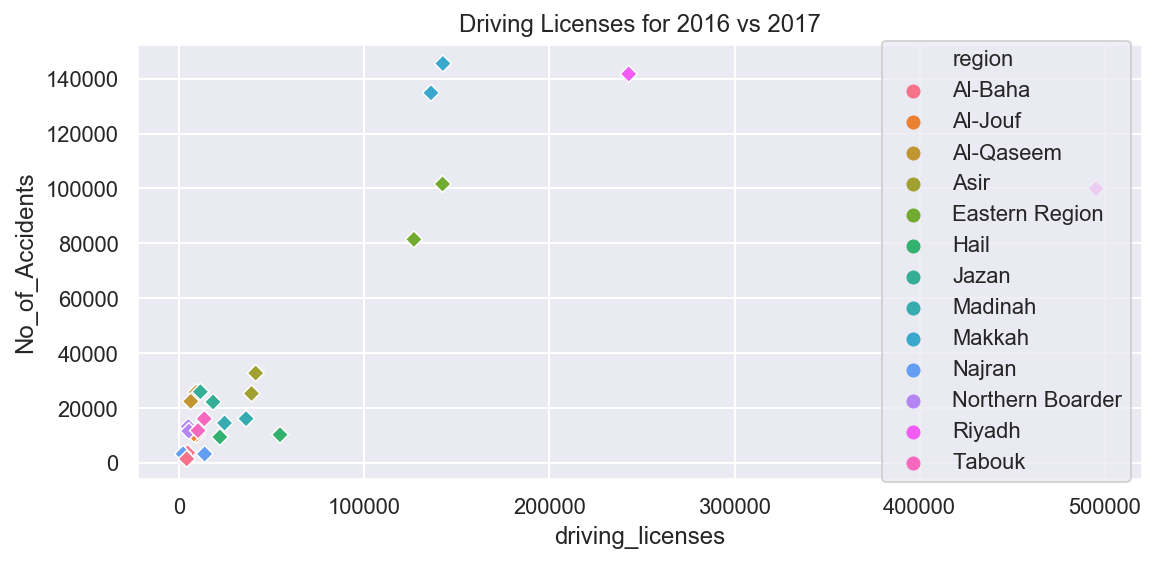

In [120]:
# plot for Driving Licenses for 2016 vs 2017
plt.figure(figsize=(9,4))
plt.title('Driving Licenses for 2016 vs 2017')
sns.scatterplot(x='driving_licenses' ,y='No_of_Accidents' ,data =Licenses_2016_2017, marker ='D', hue='region')
plt.legend(loc='right')



In [121]:
#Traffic Accidents for 2016 vs 2017
Traffic_2016_2017 = combined_accidents_licenses[combined_accidents_licenses.year.between(2016,2017)]


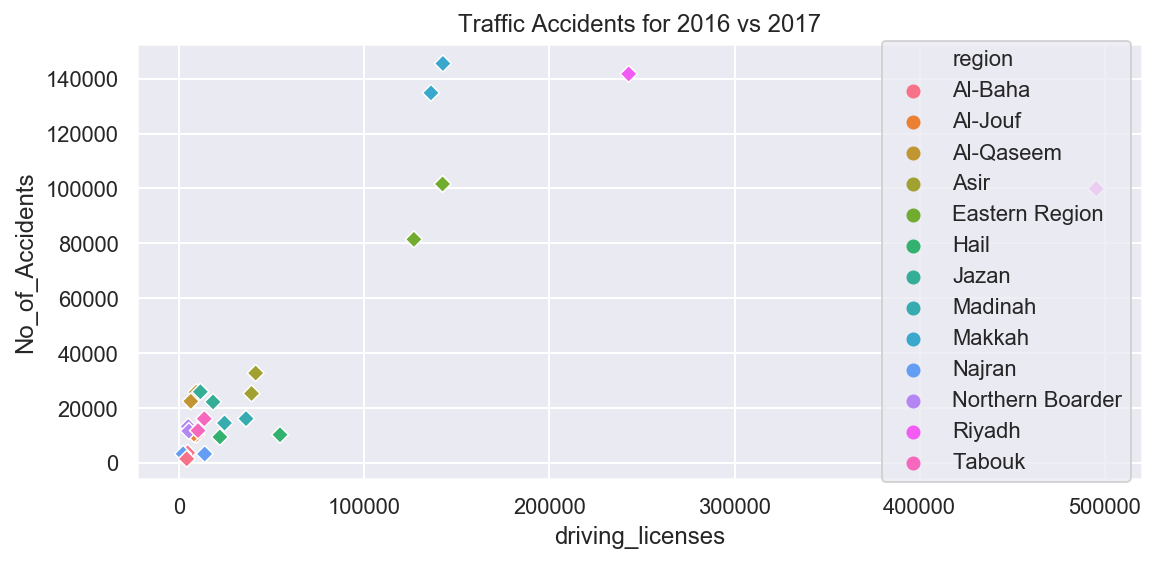

In [122]:
#plot for Traffic Accidents for 2016 vs 2017
plt.figure(figsize=(9,4))
plt.title('Traffic Accidents for 2016 vs 2017')
sns.scatterplot(x='driving_licenses' ,y='No_of_Accidents' ,data =Traffic_2016_2017, marker ='D', hue='region')
plt.legend(loc='right')



#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

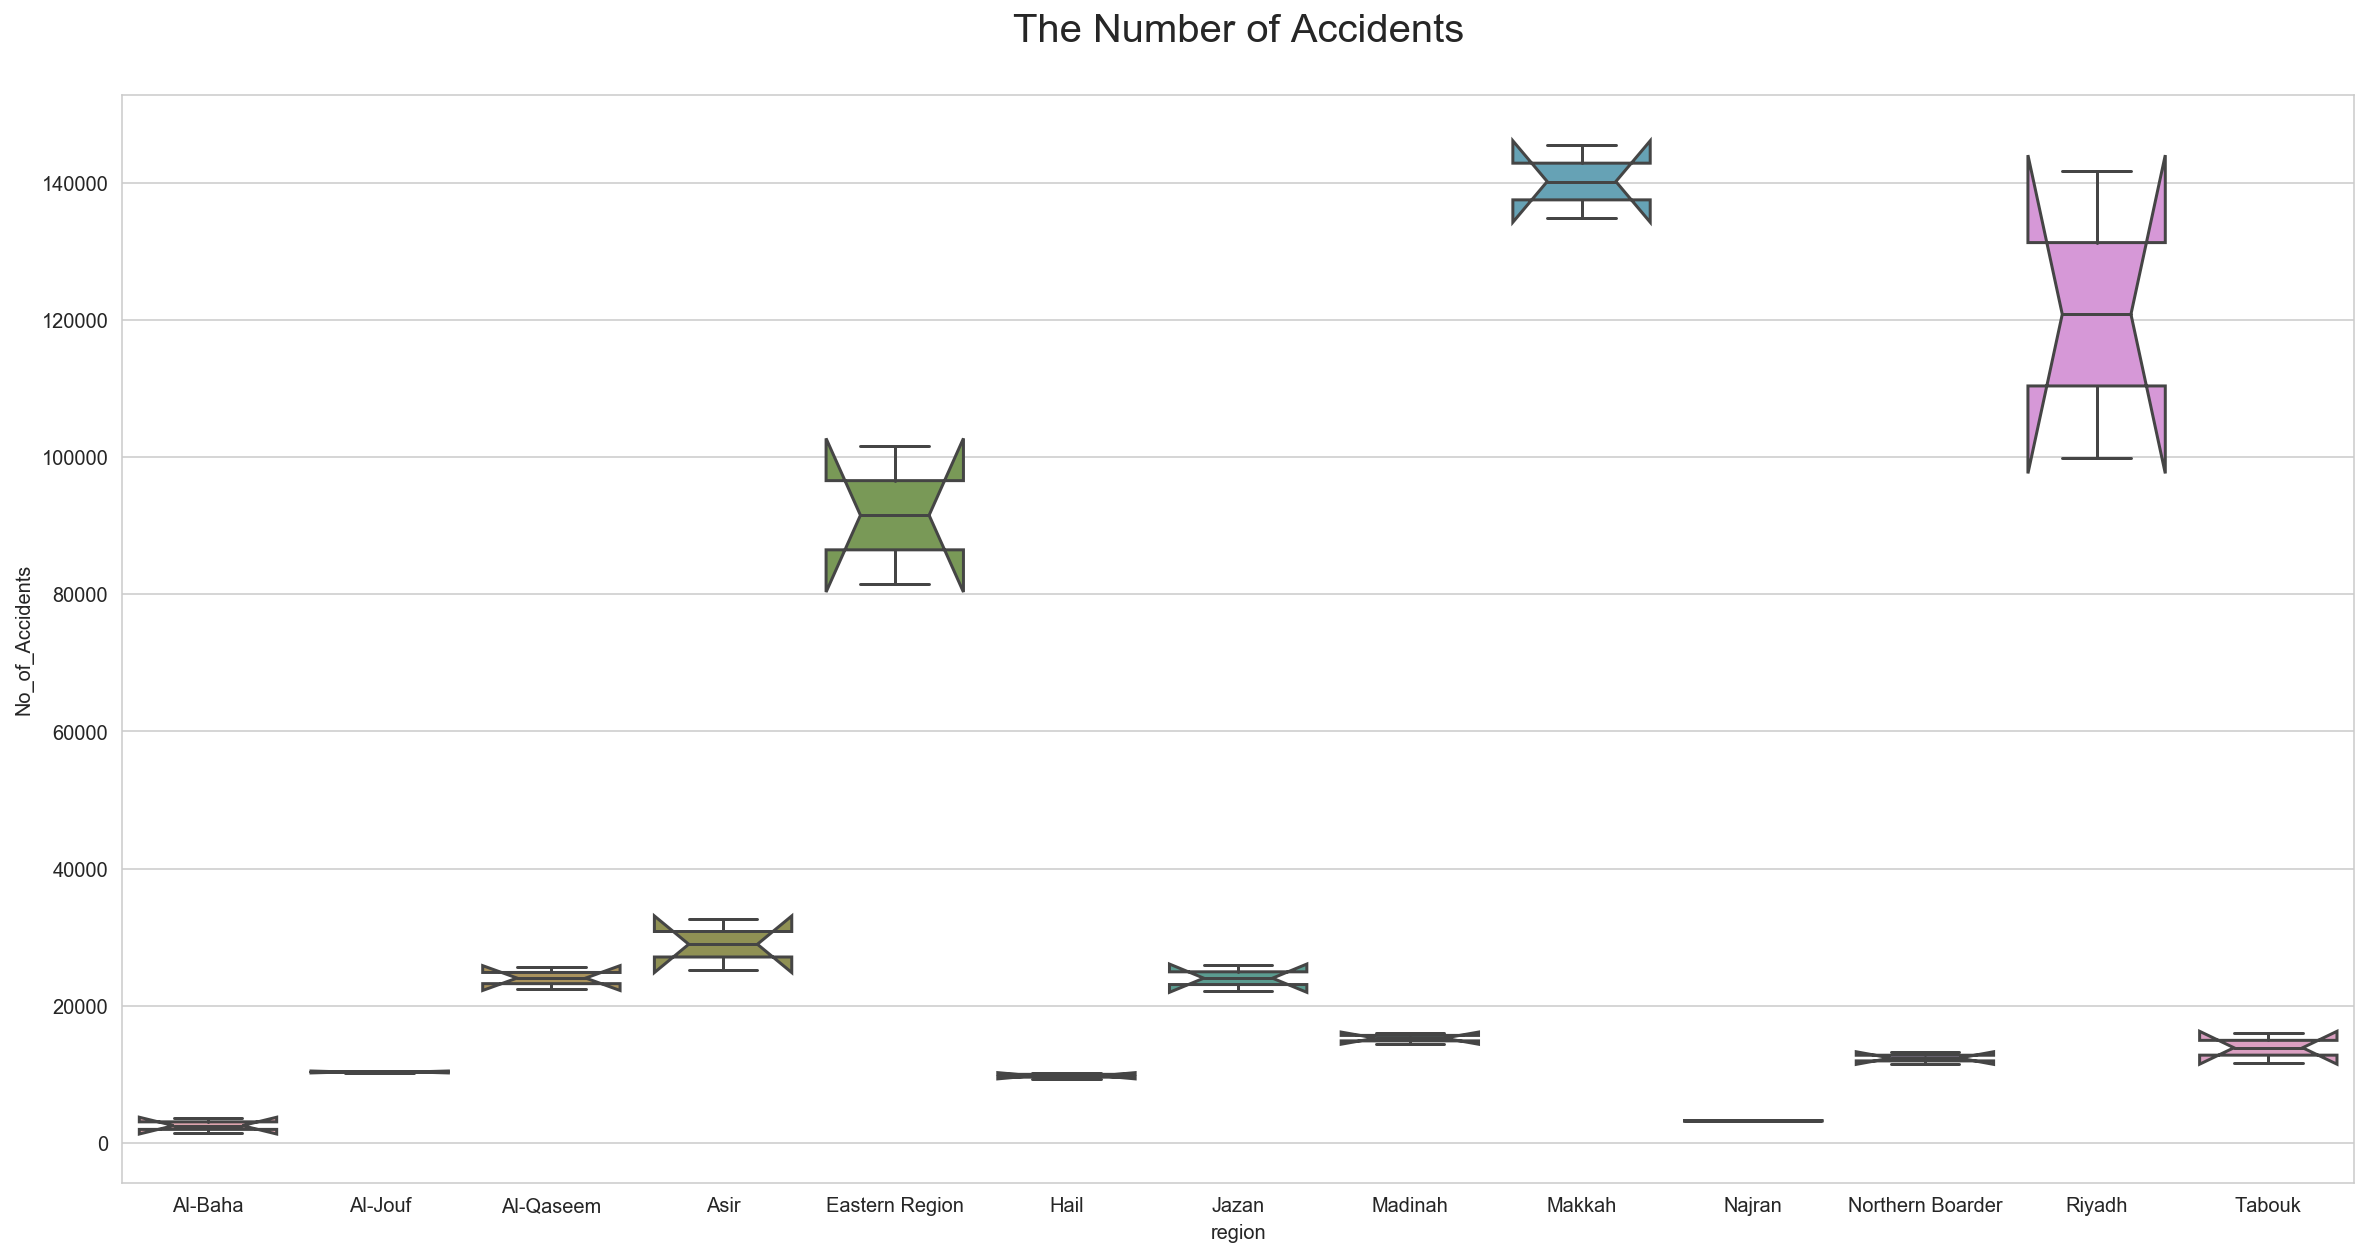

In [91]:
# creating boxplot for No_of_Accidents
fig = plt.figure(figsize=(20,10))
ax = fig.gca()

sns.boxplot(x='region', y='No_of_Accidents',data=combined_accidents_licenses, orient='v',
                fliersize=8, linewidth=1.5, notch=True,
                saturation=0.5, ax=ax)

ax.set_title('The Number of Accidents\n', fontsize=20)

plt.show()

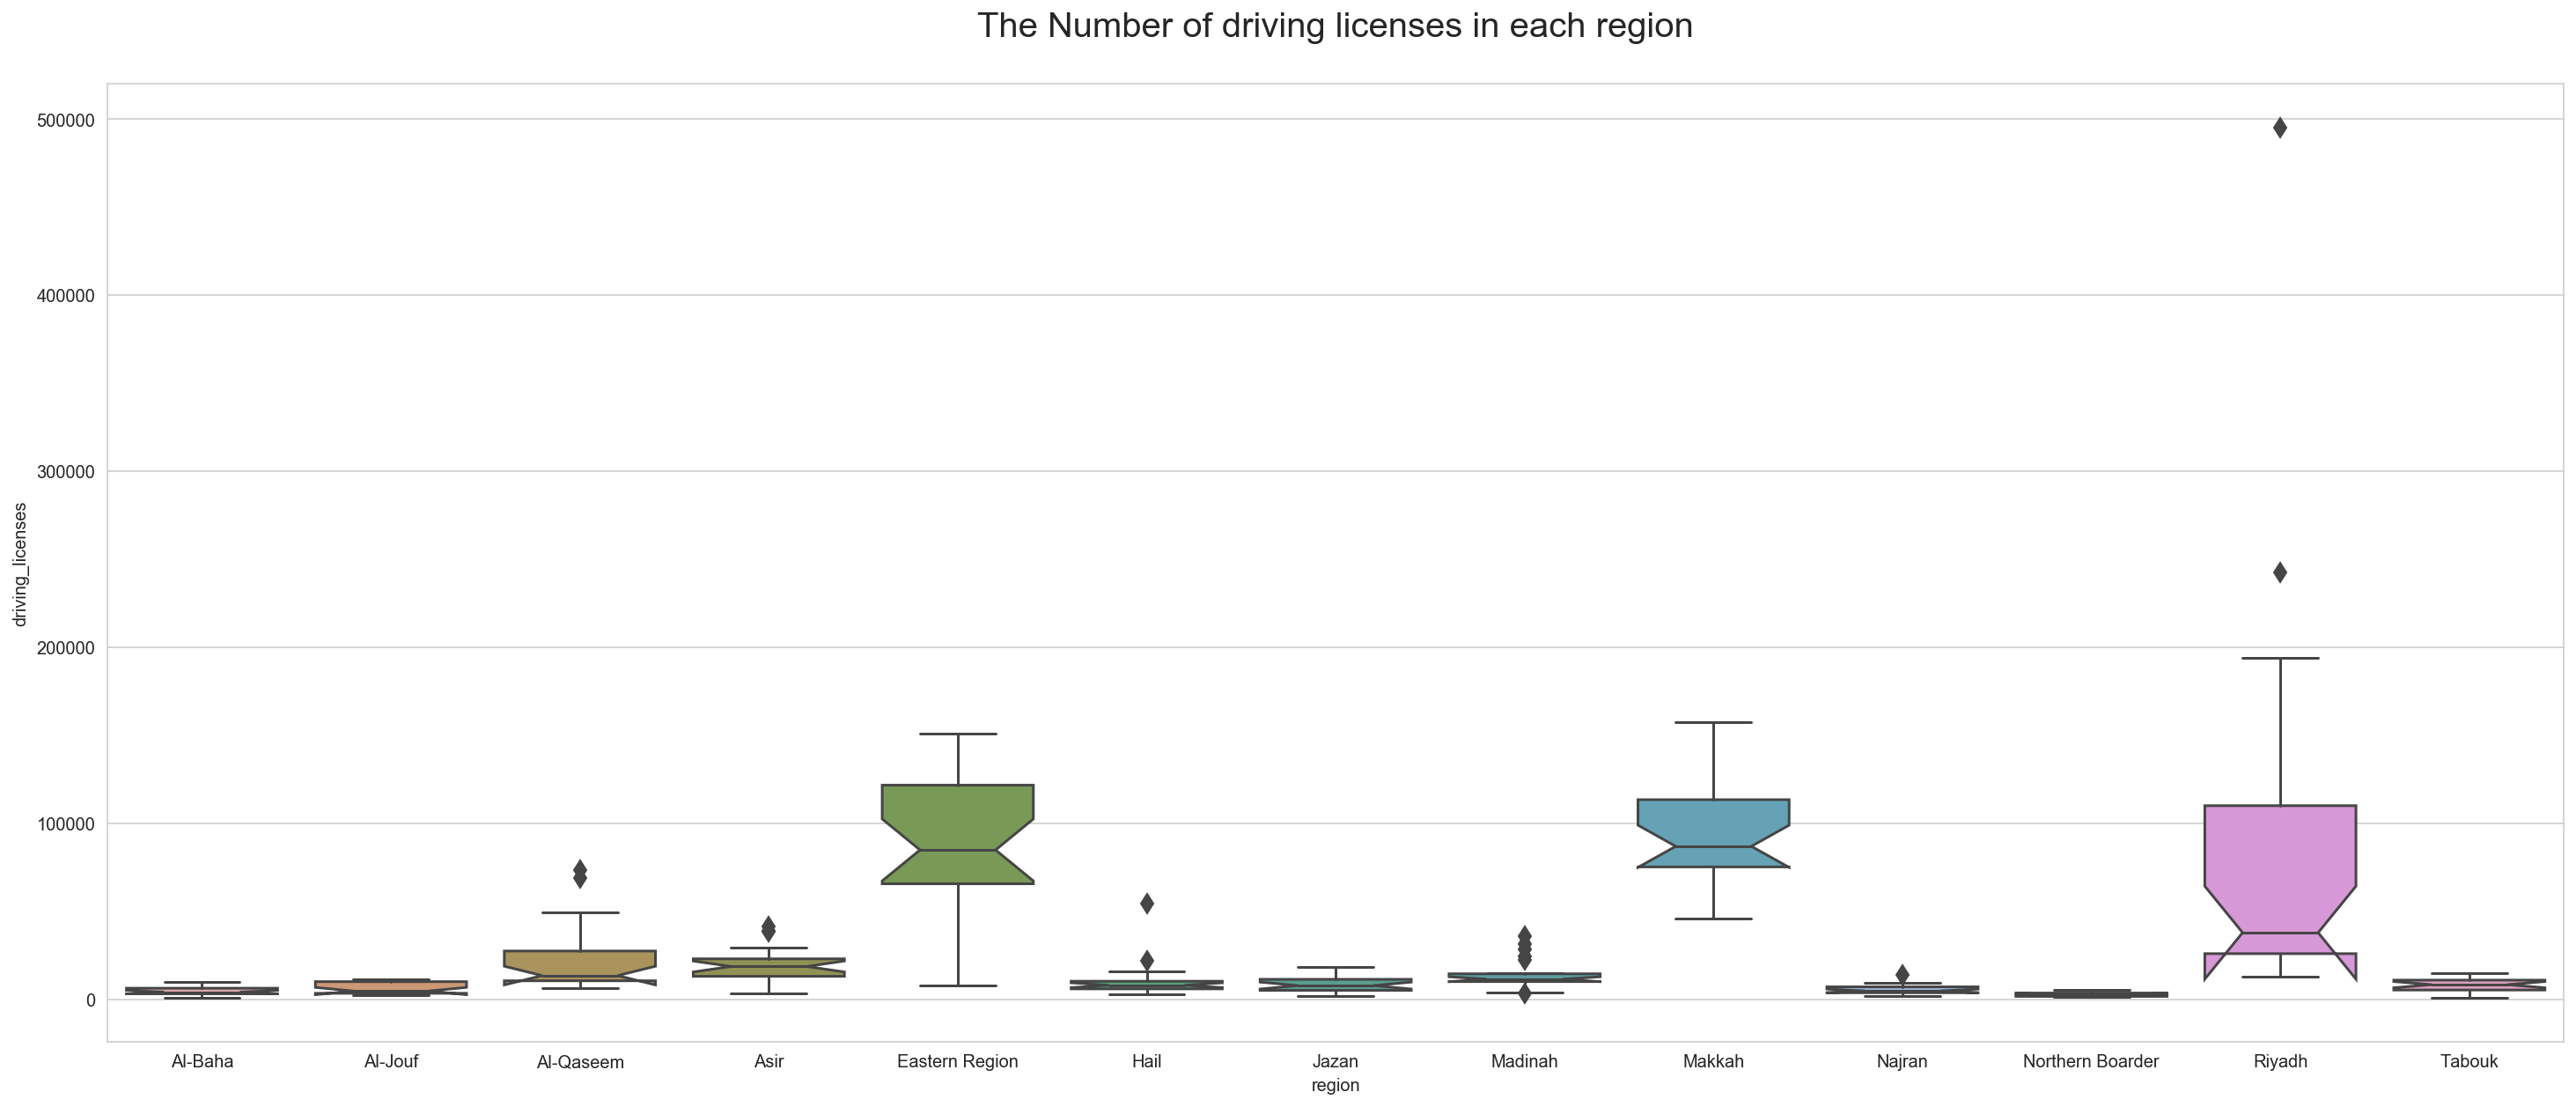

In [92]:
# creating boxplot for riving licenses in each region
fig = plt.figure(figsize=(25,10))
ax = fig.gca()

sns.boxplot(x='region', y='driving_licenses',data=combined_accidents_licenses, orient='v',
                 fliersize=8, linewidth=1.5, notch=True,
                 saturation=0.5, ax=ax)

ax.set_title('The Number of driving licenses in each region\n', fontsize=20)

plt.show()

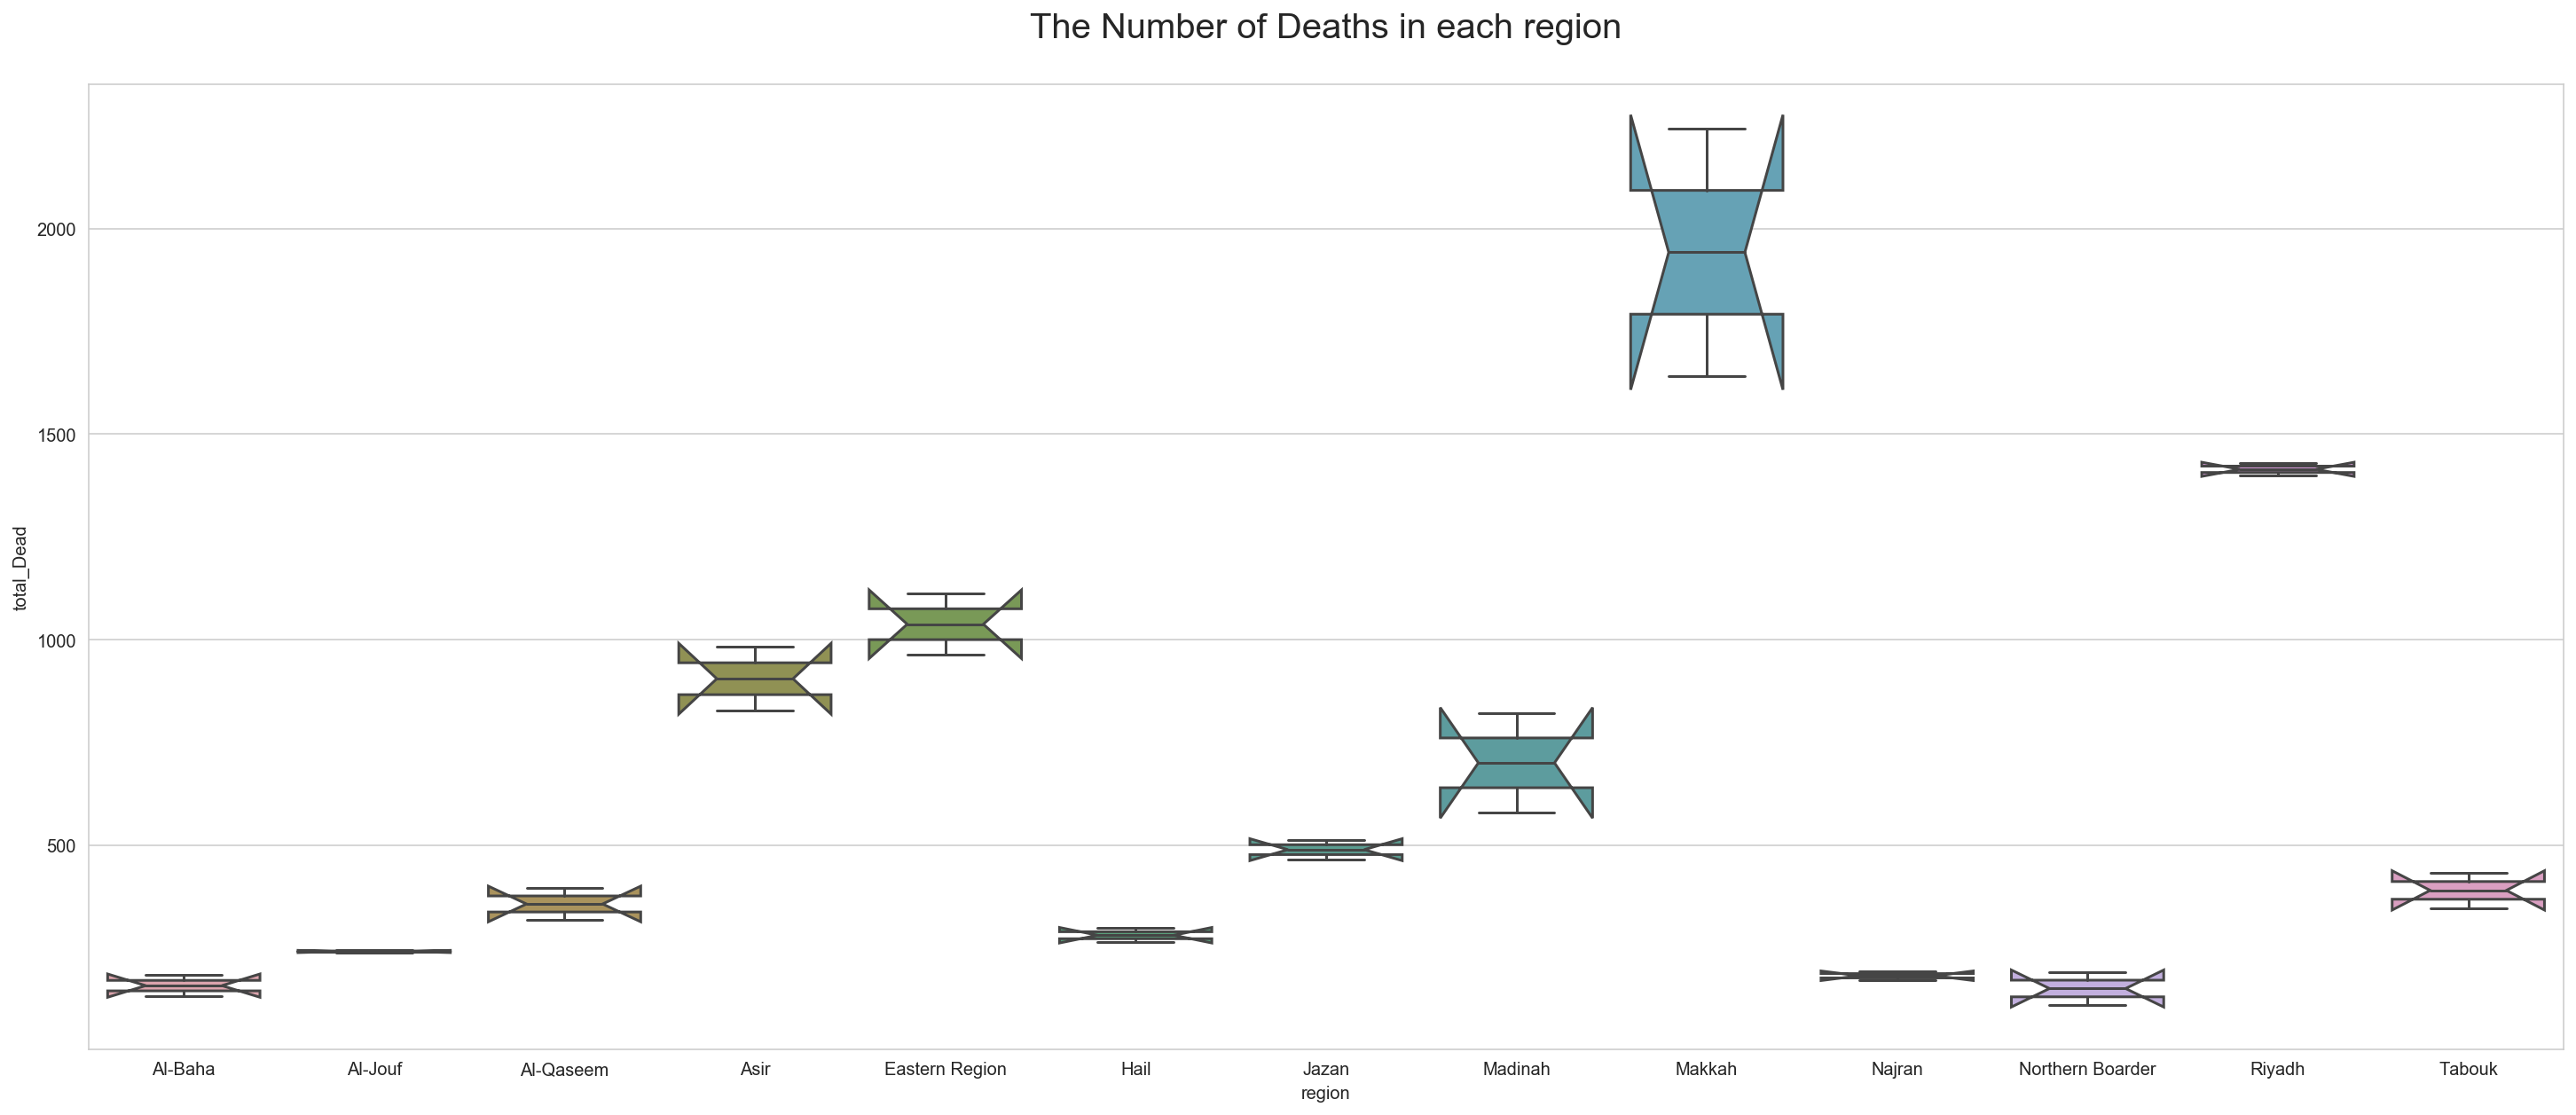

In [93]:
# creating boxplot for total_Dead', in regions
fig = plt.figure(figsize=(25,10))
ax = fig.gca()

sns.boxplot(x='region', y='total_Dead',data=combined_accidents_licenses, orient='v',
                 fliersize=8, linewidth=1.5, notch=True,
                 saturation=0.5, ax=ax)

ax.set_title('The Number of Deaths in each region\n', fontsize=20)

plt.show()


#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

From the graphs bellow it shows that all the features are Right (positive) Skewed, which mean that most of the data falls to the right side, you can easily notice the tail is longer than its left side

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

We calculated the mean, median and mode for both the Driving Licenses and Traffic Accidents from describe() bellow and found out these statistics:
    * for Traffic Accidents:
        mean (38225.692308) > median (16050.5)
    *  for Driving Licenses: 
        mean (28915.347692) > median (10267.0)
So, from these calculation the Driving Licenses and Traffic Accidents consider to be Right Skewed which mean that both the number of Accidents and Licenses is decreasing.
    

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [94]:
combined_accidents_licenses.describe()

,year,x_Longitude,y_latitude,No_of_Accidents,total_Dead,total_injured,driving_licenses,myear_acc,myear_lice
count,325.000000,325.000000,325.000000,26.000000,26.000000,26.000000,325.000000,26.000000,325.000000
mean,2005.000000,23.810447,42.602789,38225.692308,635.384615,2743.038462,28915.347692,38225.692308,28915.347692
std,7.222222,4.197987,3.254196,46493.705035,549.783381,2922.641127,47419.058819,2859.059464,12499.768992
min,1993.000000,17.207231,37.259858,1414.000000,112.000000,374.000000,915.000000,35422.153846,18278.692308
25%,1999.000000,20.148406,41.263690,10276.250000,241.250000,923.000000,4846.000000,35422.153846,20672.153846
50%,2005.000000,23.288331,41.817119,16050.500000,415.500000,1618.500000,10267.000000,38225.692308,25396.769231
75%,2011.000000,27.400846,43.343000,30981.250000,929.250000,3784.000000,25423.000000,41029.230769,30812.153846
max,2017.000000,30.197075,50.147830,145541.000000,2243.000000,12383.000000,495307.000000,41029.230769,71397.307692


In [95]:
combined_accidents_licenses['No_of_Accidents'].median()

16050.5

In [96]:
combined_accidents_licenses['driving_licenses'].median()

10267.0

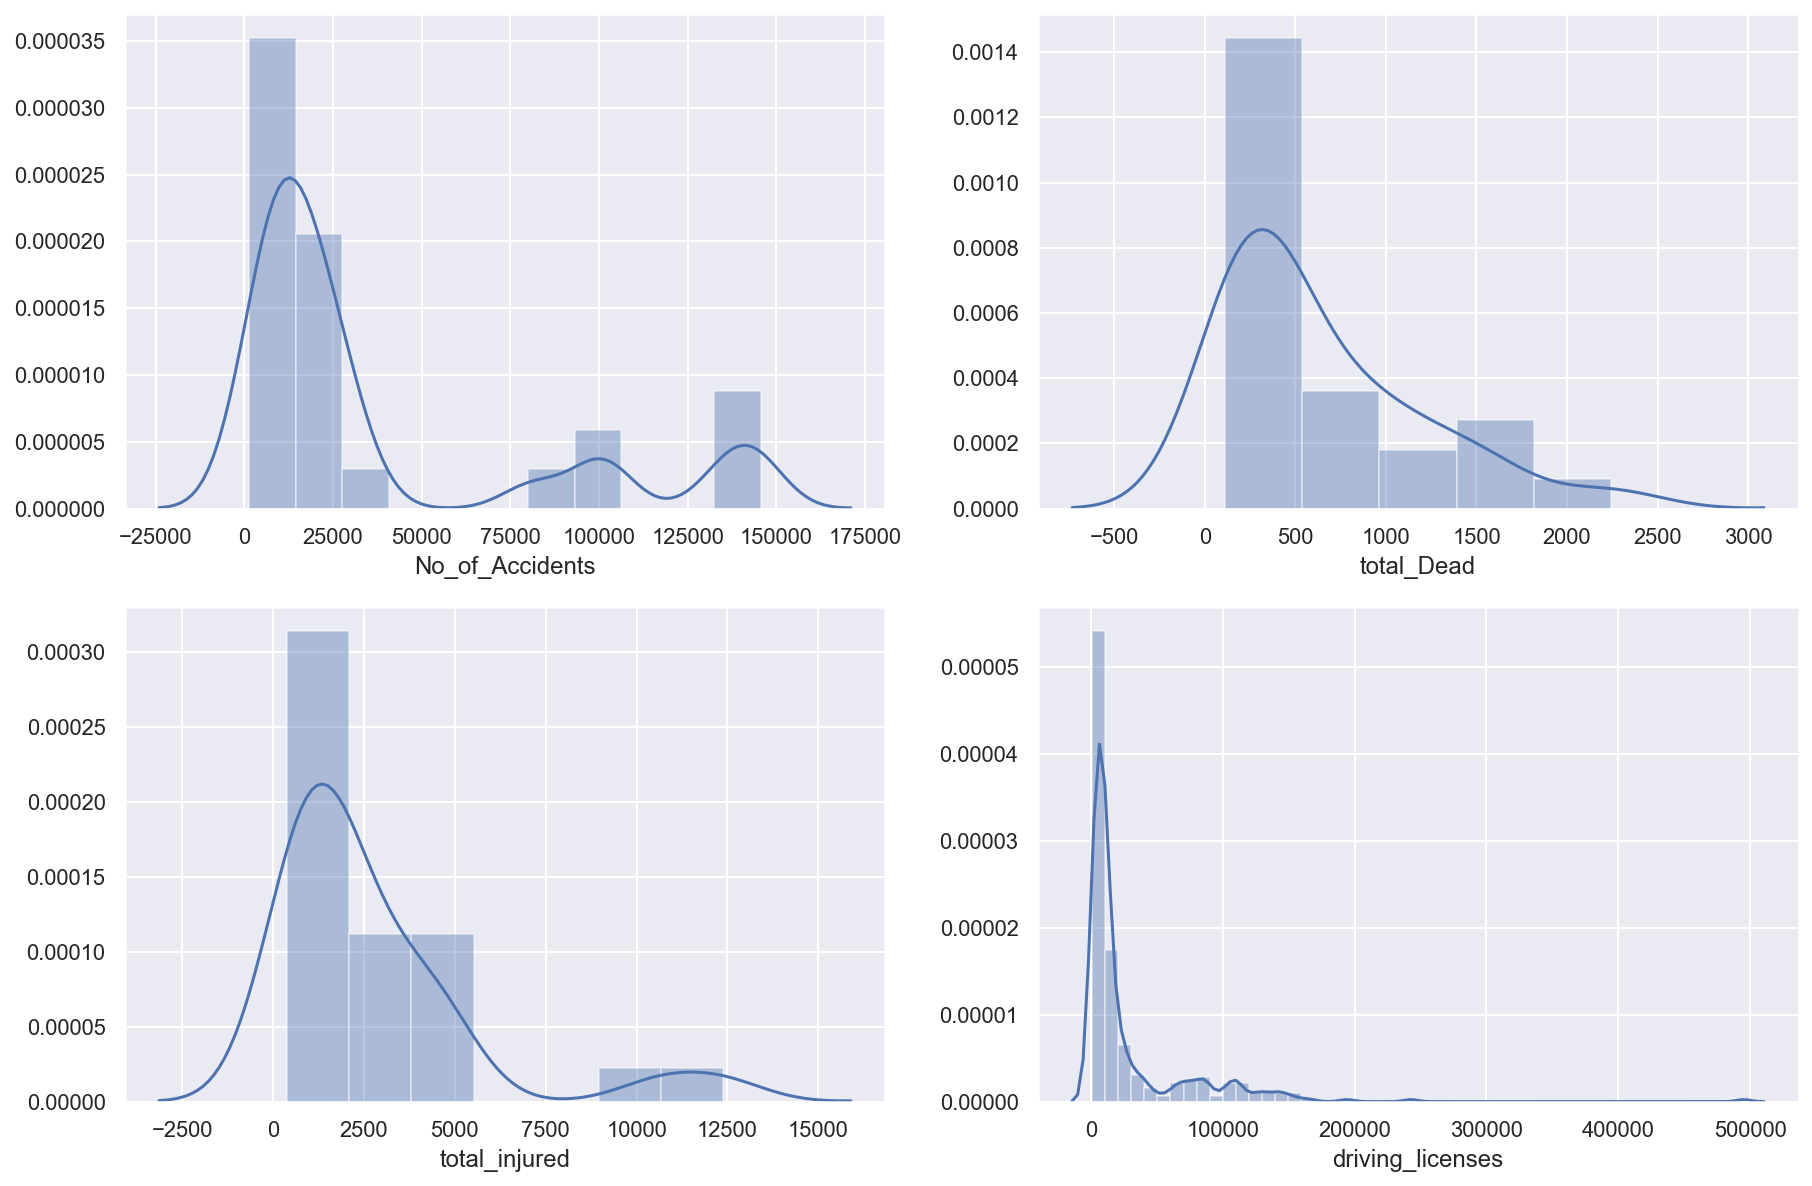

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
from pylab import *

No_of_Accidents=combined_accidents_licenses['No_of_Accidents'].dropna()
total_Dead=combined_accidents_licenses['total_Dead'].dropna()
total_injured=combined_accidents_licenses['total_injured'].dropna()
driving_licenses=combined_accidents_licenses['driving_licenses'].dropna()
year=combined_accidents_licenses['year'].dropna()

sns.set(rc={"figure.figsize": (15, 10)}); np.random.seed(0)

subplot(2,2,1)
ax = sns.distplot(No_of_Accidents)

subplot(2,2,2)
ax = sns.distplot(total_Dead)

subplot(2,2,3)
ax = sns.distplot(total_injured)

subplot(2,2,4)
ax = sns.distplot(driving_licenses)

plt.show()

## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer:

After analyzing the dataset I decided to choose the three major city in Saudi Arabia which are: Makkah, Madinah and Riyadh

In [205]:
# filter the dataset for Riyadh only to see the number of driving licenses issued through the years 
riyadh_lic= combined_accidents_licenses.loc[combined_accidents_licenses['region'].str.contains('Riyadh',case=False,regex=False)==True]


Text(0.5, 1.0, 'Number of Driving licenses in Riyadh')

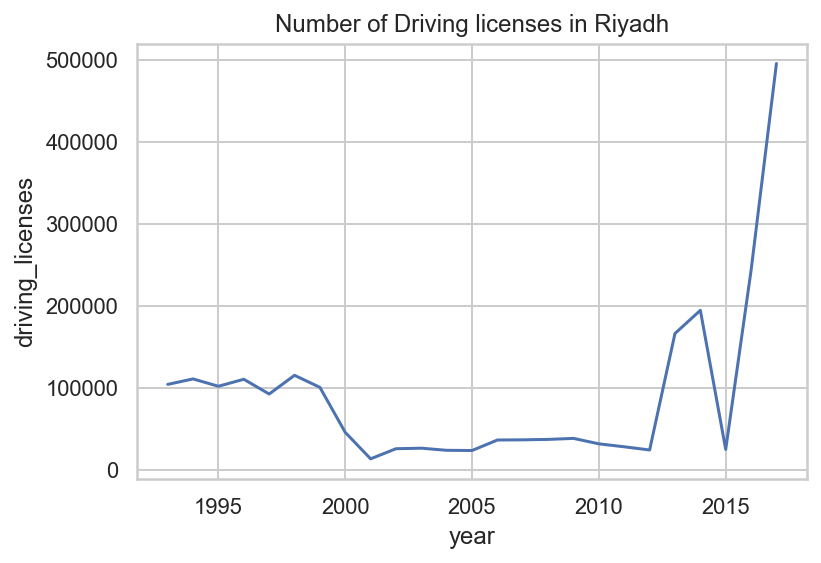

In [206]:
# plot a time line for the city of Riyadh
ax = sns.lineplot(x="year", y="driving_licenses", data=riyadh_lic)
ax.set_title('Number of Driving licenses in Riyadh')


From the time line above it shows the number of driving licenses has been issued in Riyadh city during the years. as it shows that there were a signifcant increased in licenses issued. The reason behind this was due to the Saudi government had granted the Women the Right to Drive. From an article issued by sayidaty magazine state that Riyadh ranks first in the number of driving licenses in Saudi Arabia with 495307 licenses.

In [207]:
# filter the dataset for Makkah only to see the number of driving licenses issued through the years 

makkah_lic= licenses_2004_2008.loc[licenses_2004_2008['region'].str.contains('Makkah',case=False,regex=False)==True]


Text(0.5, 1.0, 'Number of Driving licenses in Makkah')

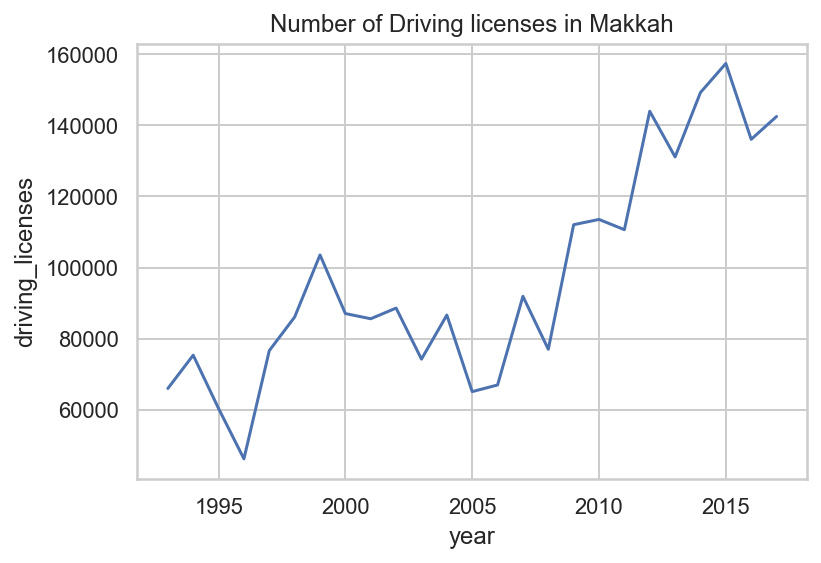

In [208]:
# plot a time line for the city of Makkah

ax = sns.lineplot(x="year", y="driving_licenses", data=makkah_lic)
ax.set_title('Number of Driving licenses in Makkah')


From the time line above it shows the number of driving licenses has been issued in Makkah city during the years. as it shows that there were a fluctuation in licenses issued. and then it increased in the last years. From the article mentioned above it state that Makkah ranks seconed in the number of licences issued in the kingdom with approximately of 157389 licences.

In [209]:
# filter the dataset for Riyadh only to see the number of driving licenses issued through the years 

madinah_lic= licenses_2004_2008.loc[licenses_2004_2008['region'].str.contains('Madinah',case=False,regex=False)==True]


Text(0.5, 1.0, 'Number of Driving licenses in Madinah')

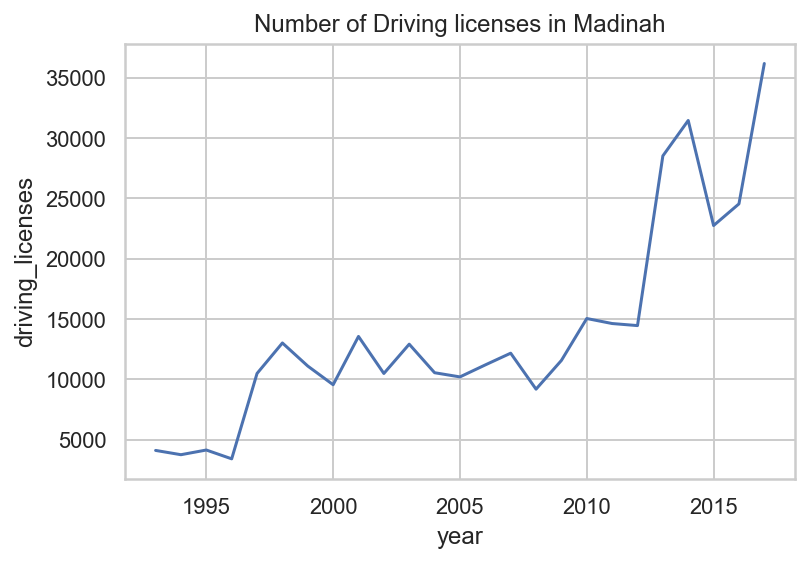

In [210]:
# plot a time line for the city of Riyadh

ax = sns.lineplot(x="year", y="driving_licenses", data=madinah_lic)
ax.set_title('Number of Driving licenses in Madinah')


From the time line above it shows the number of driving licenses has been issued in Madinah city during the years. as it shows that there were an increasing in licenses issued in 2015. From the article mentioned above it state that Madinah ranks 5th in the number of licences issued in the kingdom with approximately of 36165 licences.

In [104]:
# filter the dataset for Riyadh only to see the number of Traffic Accidents issued through the years 

riyadh_acci= combined_accidents_licenses.loc[combined_accidents_licenses['region'].str.contains('Riyadh',case=False,regex=False)==True]


Text(0.5, 1.0, 'Number of Traffic Accidents in Riyadh')

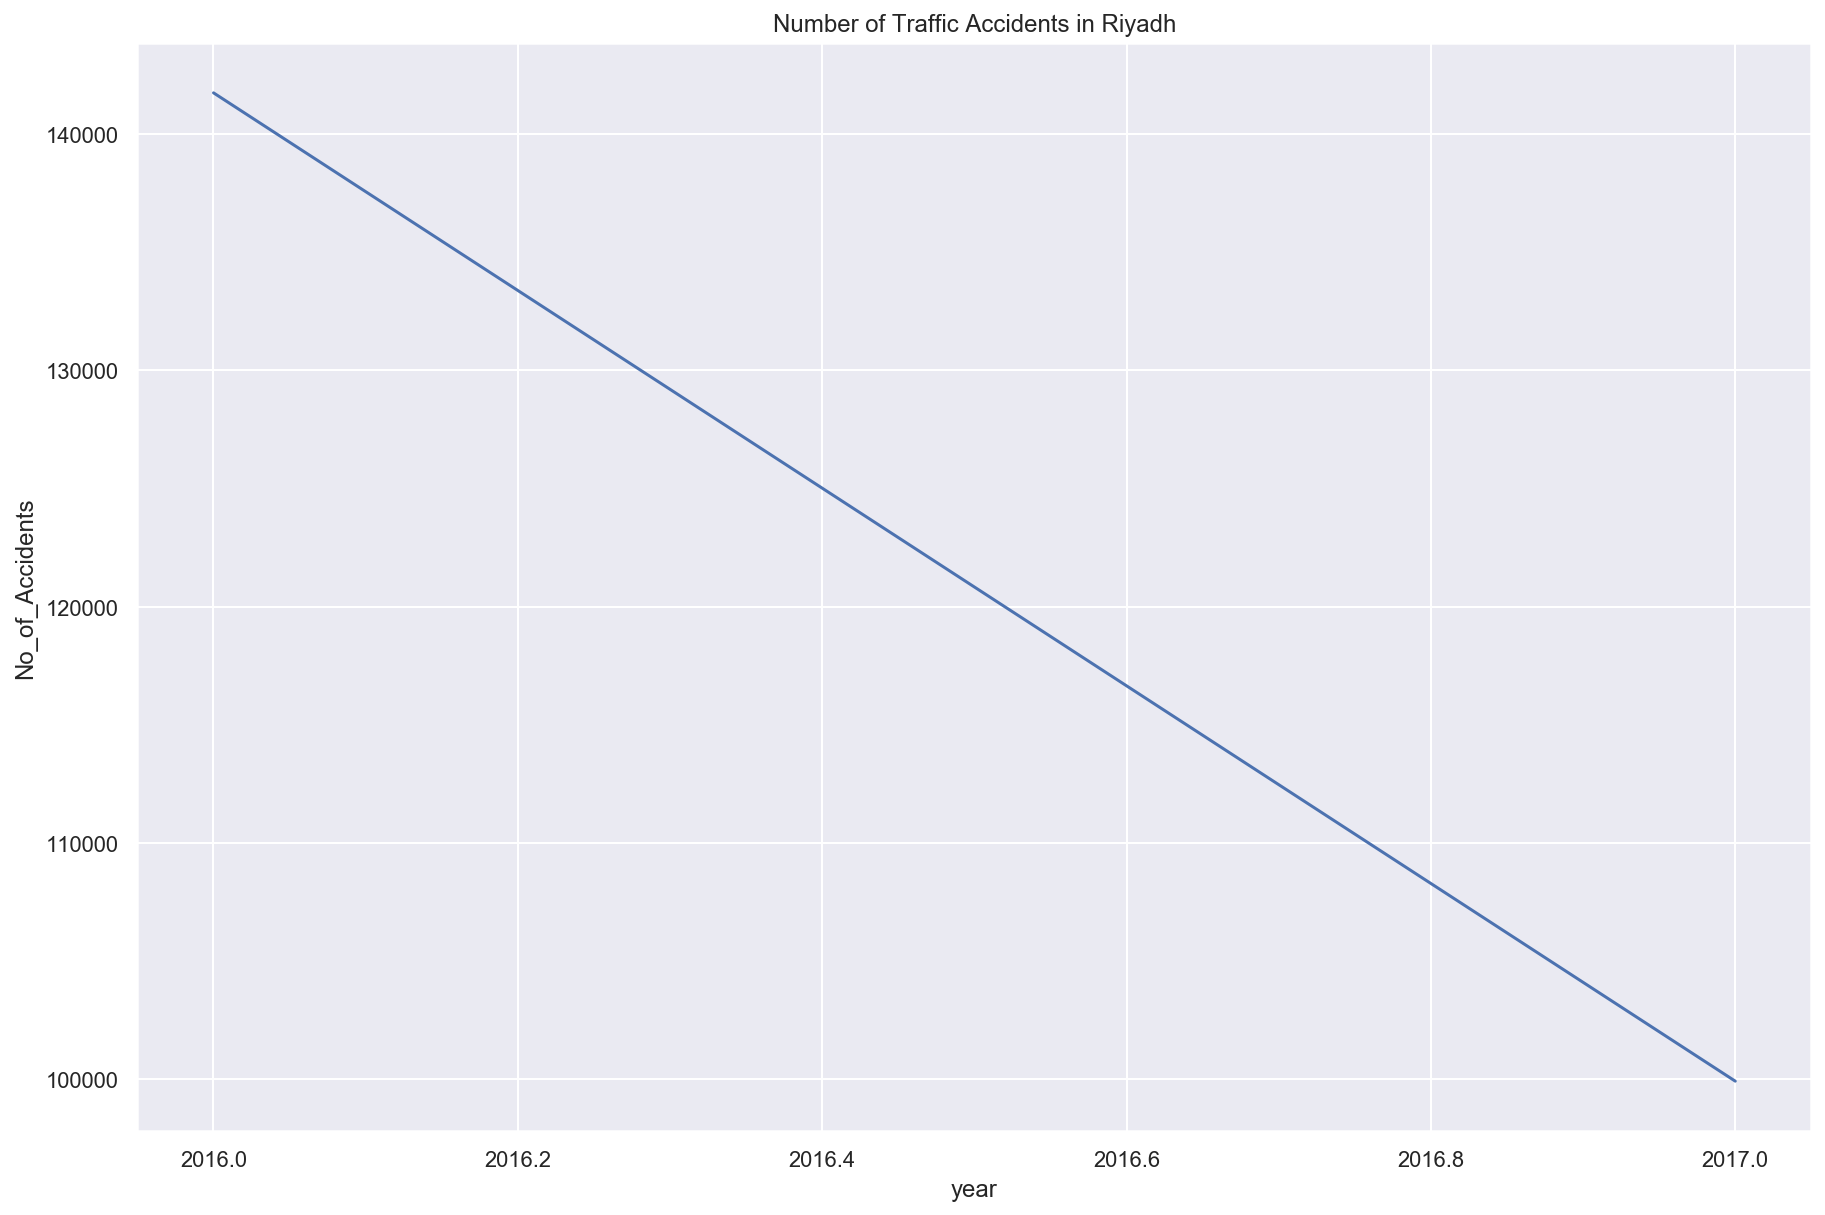

In [105]:
# plot a time line for the city of Riyadh

ax = sns.lineplot(x="year", y="No_of_Accidents", data=riyadh_acci)
ax.set_title('Number of Traffic Accidents in Riyadh')


From the time line above it shows the number of Traffic Accidents occured in Riyadh city during the 2016 & 2017 which is provided in the dataset. as it shows that there were a signifcant decreased in Traffic Accidents in 2017. The reason behind this was due to the Saudi Traffic Security's Laws and regulations. The restrict laws and Expensive fines led to be commeted in the traffic system and rules. From the graph, it state that Riyadh the number of Traffic Accidents in Saudi Arabia was 141736 accidents.


In [106]:
# filter the dataset for Makkah only to see the number of Traffic Accidents issued through the years 

makkah_acci= combined_accidents_licenses.loc[combined_accidents_licenses['region'].str.contains('Makkah',case=False,regex=False)==True]


Text(0.5, 1.0, 'Number of Traffic Accidents in Makkah')

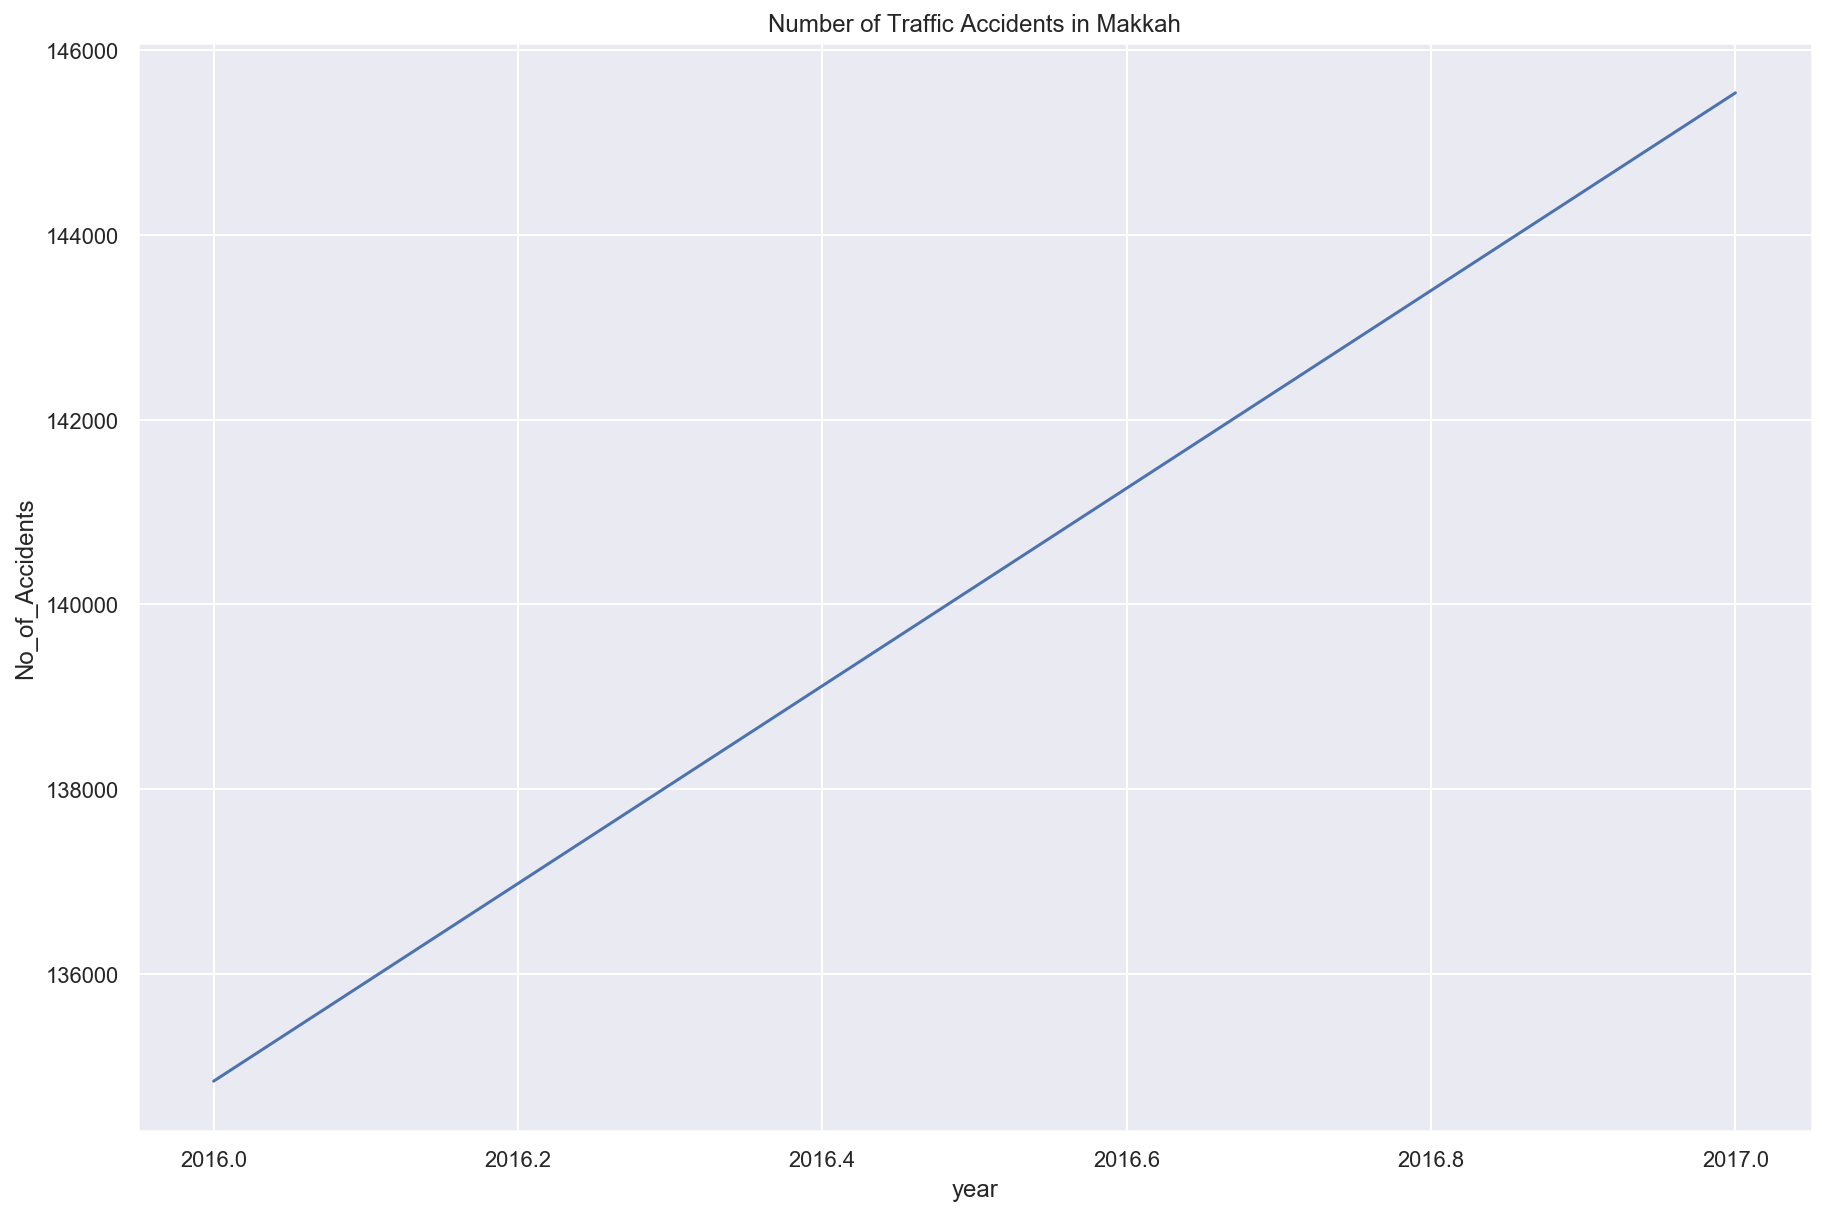

In [107]:
# plot a time line for the city of Makkah

ax = sns.lineplot(x="year", y="No_of_Accidents", data=makkah_acci)
ax.set_title('Number of Traffic Accidents in Makkah')


From the time line above it shows the number of Traffic Accidents occured in Makkah city, as it shows that there were a signifcant indrease in Traffic Accidents in 2017. From the graph, it state that Makkah the number of Traffic Accidents in Saudi Arabia was 145541 accidents.

In [108]:
# filter the dataset for Madinah only to see the number of Traffic Accidents issued through the years 

madinah_acci= combined_accidents_licenses.loc[combined_accidents_licenses['region'].str.contains('Madinah',case=False,regex=False)==True]


Text(0.5, 1.0, 'Number of Traffic Accidents in Madinah')

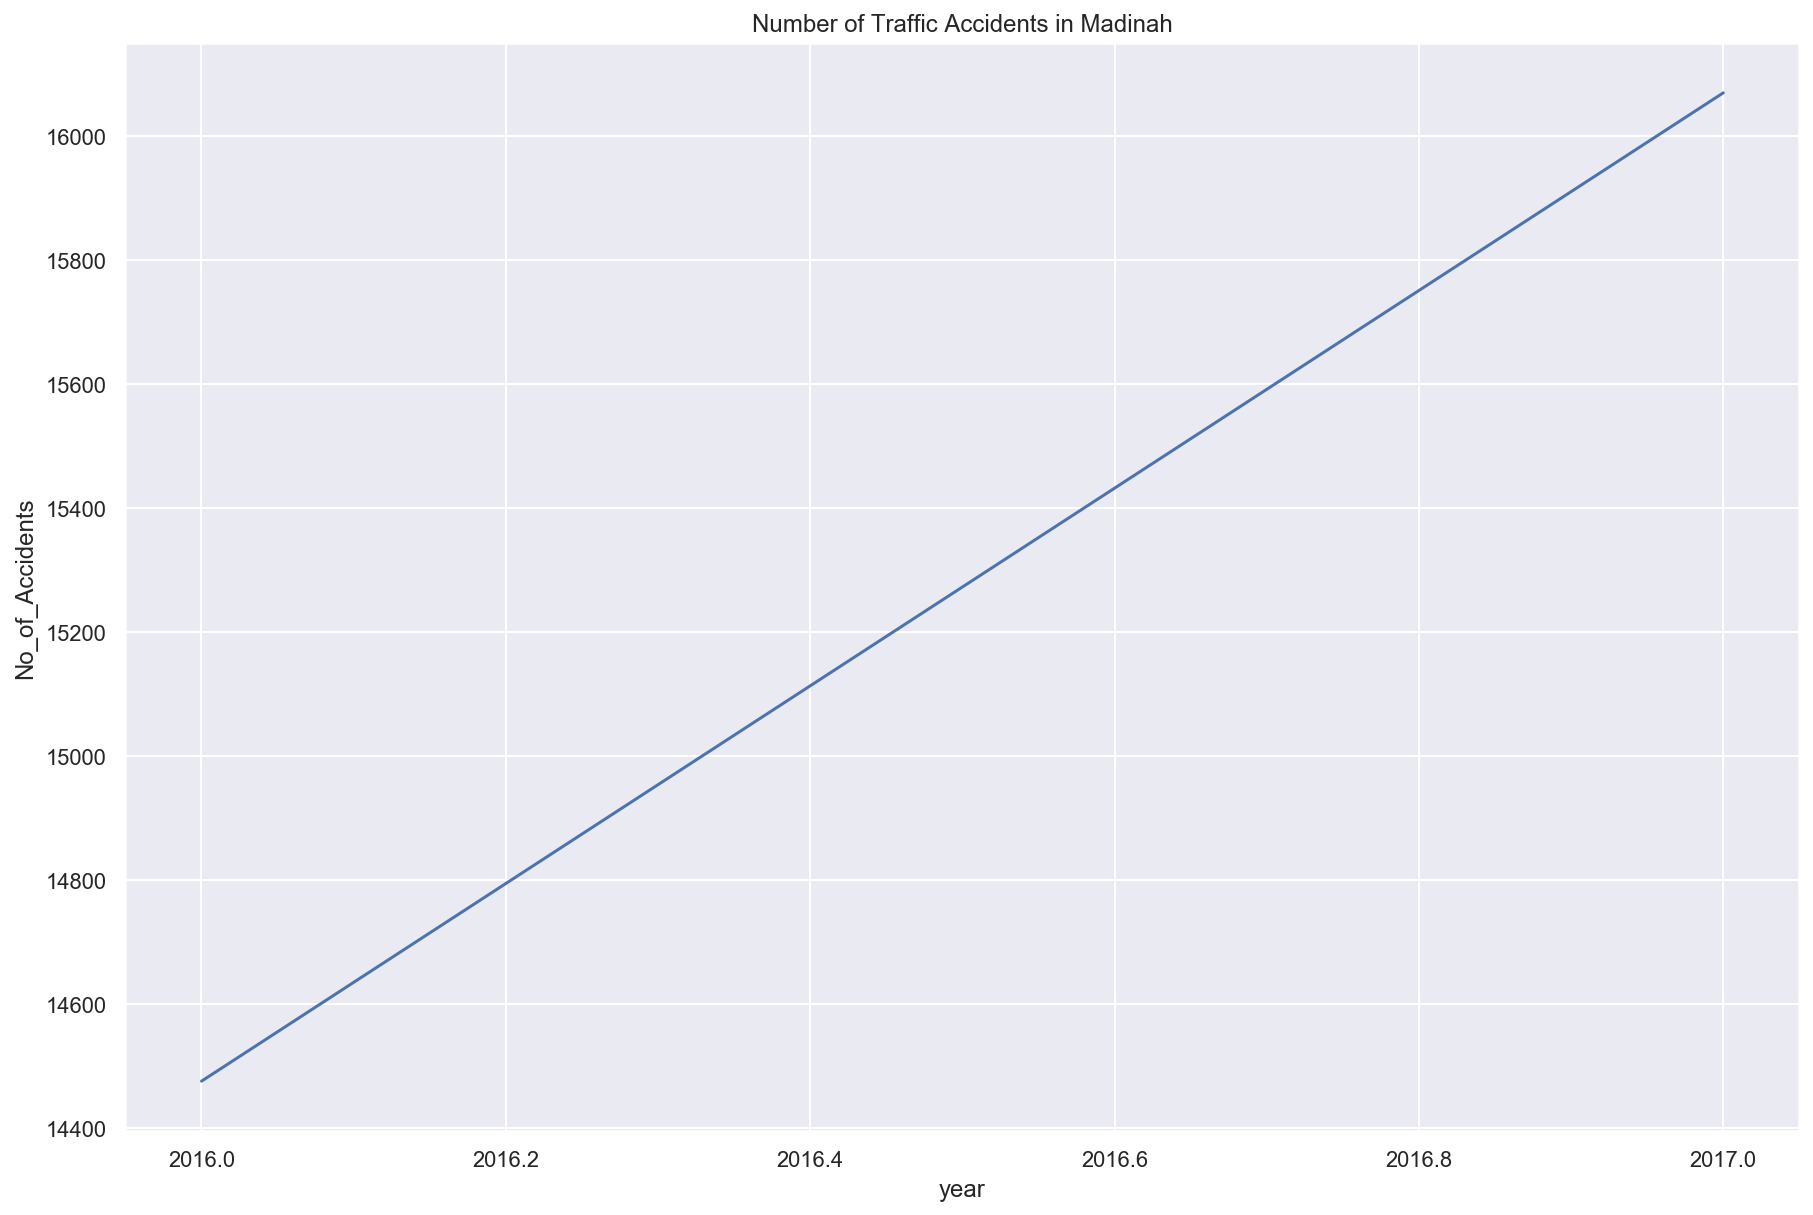

In [109]:
# plot a time line for the city of Madinah

ax = sns.lineplot(x="year", y="No_of_Accidents", data=madinah_acci)
ax.set_title('Number of Traffic Accidents in Madinah')


From the time line above it shows the number of Traffic Accidents occured in Maddinah city, as it shows that there were a signifcant indrease in Traffic Accidents in 2017. From the graph, it state that Madinah the number of Traffic Accidents in Saudi Arabia with 16070 accidents.

## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

Answer:

Based on the data given, we still missing number of accidents before 2016. However, we can come up with these recomendations.
Bellow are set of recomendations to reduce the Traffic accidents:
1. Set a Strict laws and expensive Fines for traffic violations.
2. Increase the Awareness of the Traffic systems 
3. since the women in Saudi Arabia are still new to driving make a speacial programs targting them.

## Reference:

* https://www.nytimes.com/2019/06/24/world/middleeast/saudi-driving-ban-anniversary.html
* https://cars.sayidaty.net/node/12561/
* https://www.nytimes.com/2019/06/24/world/middleeast/saudi-driving-ban-anniversary.html
* https://www.moi.gov.sa/wps/portal/Home/sectors/publicsecurity/traffic/contents/!ut/p/z1/pVPLbsIwEPyVcugRef0gCUcX0jhAiwIKEF-q1E1at-QBjdLH19dwQCotBMSe1tLsrGc8RhItkMzjWj_HlS7yeGnOkbQewGdMYEaGXj_oAA-G7tjvUwIuoPkW0A28nhAbAOYWcN8mY_A72PMJkqfM7wDAnVvgnM6EsAMyHp443_O4YPYIwBl5HfC5CCfdgFLg9MT9B4pD0_wMSSRVXpXVC4qqdZymWl3DrslinV9DrYvl1tGrMjGuVjp534yVSj-hyGaUxhYAYxa2sbJiRUmqEqoINq2y9y36ewd5XMF8s6vBpCYO-duHf57pKMDB-4A9FZygyMi0D8vEaF7r5AOFebHOTDKnZzgooIndvoD9OHVILqAeNMXP_E_9ulpJbkJY5FXyWaHFOSmcJjkqs9BU5tCv9tvETe9cyqJB_X1z35aPjLdaP3rWooE!/dz/d5/L2dBISEvZ0FBIS9nQSEh/
    